In [1]:
%run '/home/gvolta/XENON1T/Function/Useful/Def.ipynb'
%run '/home/gvolta/XENON1T/Function/Useful/S1PL_Def.ipynb'

Initialization done, Notebook was last run on: 14/01/2020
Initialization for S1PL, Notebook was last run on: 14/01/2020


In [2]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

In [3]:
#file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/selected/'
file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/bkg_1TFV/'

In [4]:
#data = pd.read_pickle(file_path + 'bkg_cutted_SR1_S1PL.pkl')
data = pd.read_pickle(file_path + 'bkg_cutted_1TFV_SR1_S1PL.pkl')
data['CES'] = CES(data, 'cs2_bottom_ap')
data_1 = data[data['s1']<3e4]

# Spectrum of bkg data

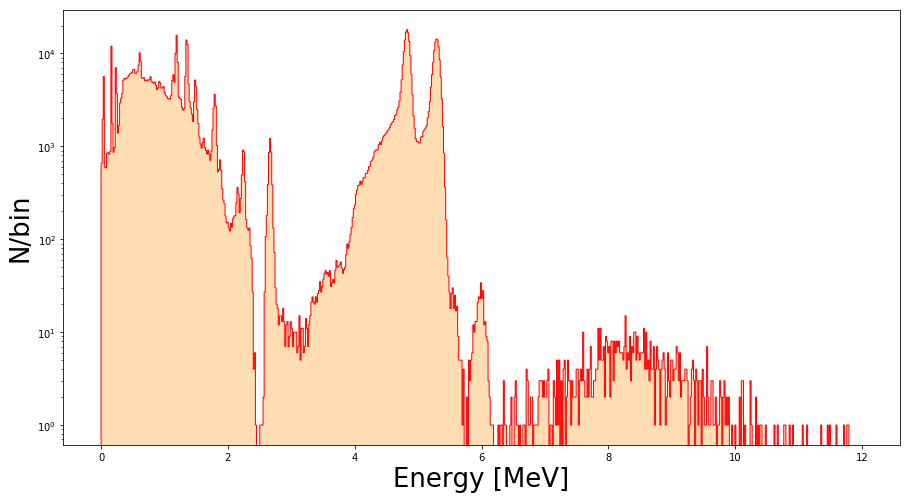

In [5]:
plt.figure(figsize=(15,8))
plt.hist(data['CES']/10**6, bins = (700), 
         range=(0, 12), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data['CES']/10**6, bins = (700), 
         range=(0, 12), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [MeV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


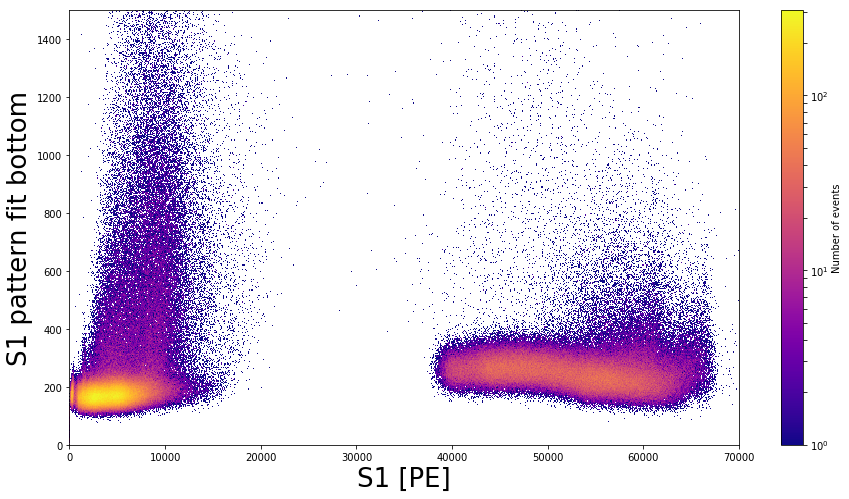

In [6]:
plt.figure(figsize=(15,8))
plt.hist2d(data['s1'], data['s1_pattern_fit_bottom_hax'], bins = (1000, 400), 
           range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
#plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
#plt.hlines(y=400, xmax=1.5e5, xmin=0, colors='k', linestyles='solid')

# Spectrum of bkg data below 2e4 PE

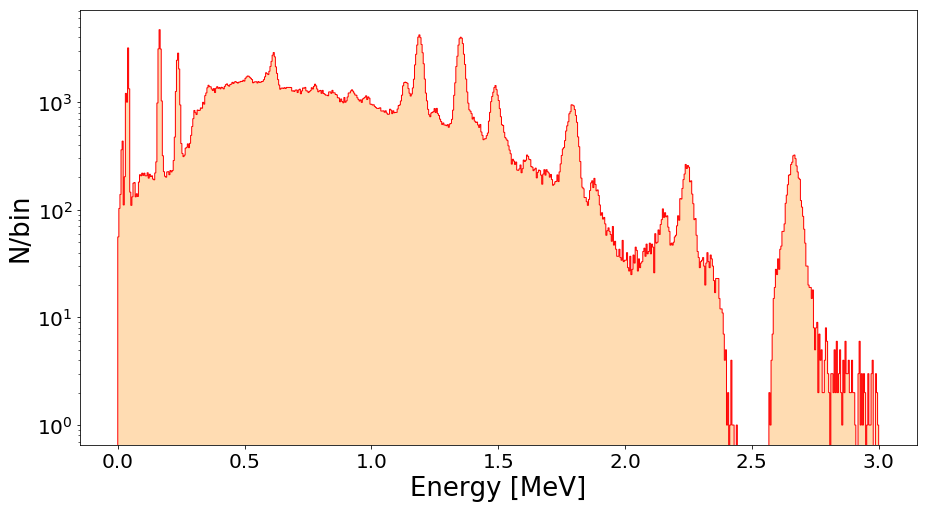

In [7]:
plt.figure(figsize=(15,8))
plt.hist(data_1['CES']/10**6, bins = (700), 
         range=(0,3), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data_1['CES']/10**6, bins = (700), 
         range=(0,3), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [MeV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')
plt.tick_params(labelsize=20)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


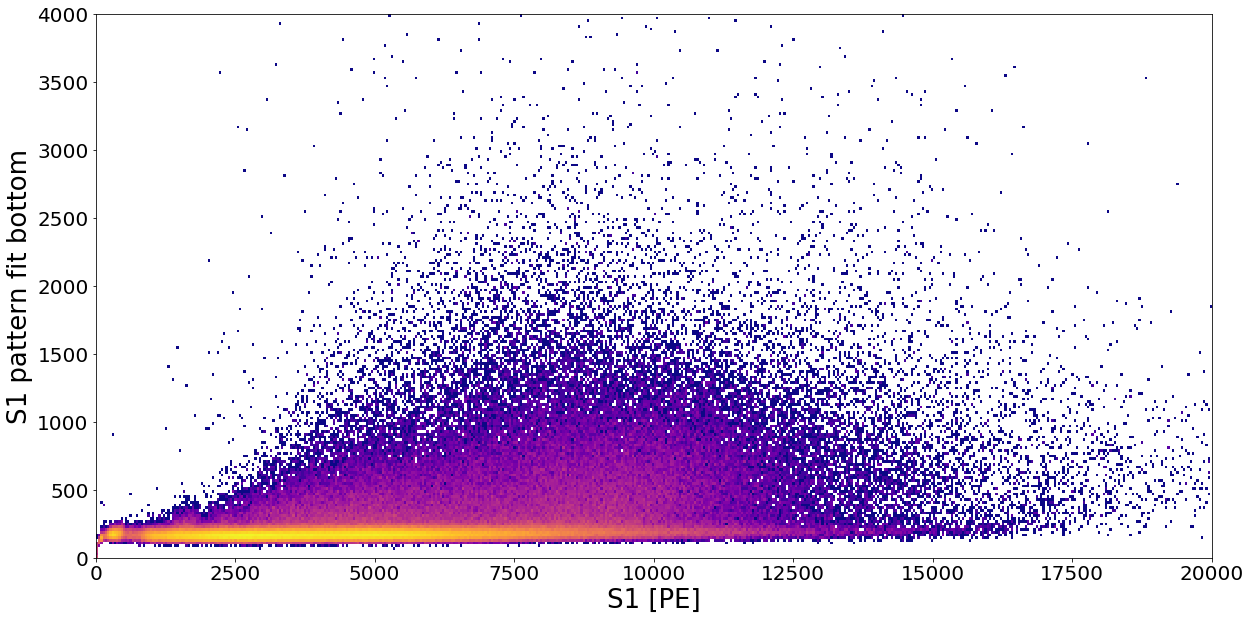

In [8]:
plt.figure(figsize=(20,10))
plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], bins = (500, 200), 
           range=((0,2e4), (0,4000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#plt.hlines(y=400, xmax=2e5, xmin=0, colors='k', linestyles='solid')

### Cut on z 
- hist x= x y = s1_pl
- per ogni bin in z calcolta 99%
- fitta con exp

In [9]:
xbins = np.linspace(-92, -9, 50)
ybins = np.linspace(0,5e3, 1000)

hist_1, xbins_1, ybins_1 = np.histogram2d(data_1['z_3d_nn_tf'], 
                                         data_1['s1_pattern_fit_bottom_hax'],
                                         bins=(xbins, ybins), 
                                         #range=((-83.45, -13.45), (0.0,1000))
                                         )

ybins_center_z = np.asarray([0.5*(ybins_1[i]+ybins_1[i+1]) for i in range(len(ybins_1)-1)])
xbins_center_z = np.asarray([0.5*(xbins_1[i]+xbins_1[i+1]) for i in range(len(xbins_1)-1)])

perc_z = np.empty(len(xbins_center_z))
for i in tqdm(range(len(hist_1))):
    perc_z[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                           q=0.997, var1='z_3d_nn_tf', var2='s1 patter fit hax')
    
xbins_center_valid_z, perc_valid_z = dropNaNforFit(xbins_center_z, perc_z)

perc_z_low = np.empty(len(xbins_center_z))
for i in tqdm(range(len(hist_1))):
    perc_z_low[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                           q=0.003, var1='z_3d_nn_tf', var2='s1 patter fit hax')
    
xbins_center_valid_z, perc_valid_z_low = dropNaNforFit(xbins_center_z, perc_z_low)
# perc_valid -> 99% s1 pattern fit in s1 slice
# xbins_center_valid -> correspondent s1 to 99,7% s1 pattern fit
del hist_1, xbins_1, ybins_1

100%|██████████| 49/49 [00:05<00:00,  8.63it/s]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


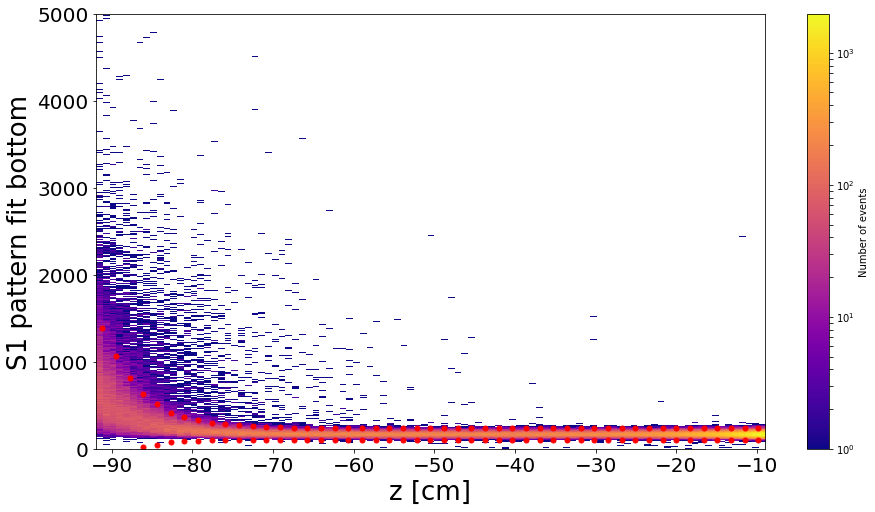

In [11]:
xbins = np.linspace(-92, -9, 100)
ybins = np.linspace(0,5e3, 1000)

plt.figure(figsize=(15,8))
hist_z, xbins_z, ybins_z, _ = plt.hist2d(data_1['z_3d_nn_tf'], 
                                         data_1['s1_pattern_fit_bottom_hax'],
                                         bins=[xbins, ybins], 
                                         #range=((-83.45, -13.45), (0.0,5000)), 
                                         cmap=plt.cm.plasma, 
                                         norm=matplotlib.colors.LogNorm(),
                                         cmin = 1,alpha = 1)
plt.plot(xbins_center_valid_z, perc_valid_z, 'ro', ms = 5)
plt.plot(xbins_center_valid_z, perc_valid_z_low, 'ro', ms = 5)

plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

del hist_z, xbins_z, ybins_z, _

popt_z:
  [2.36860036e+02 4.53297865e-06 2.12433182e-01] 

pcov_z: 
 [[ 6.66281978e-01 -1.75610910e-07  4.21786338e-04]
 [-1.75610910e-07  3.42204798e-13 -8.39717835e-10]
 [ 4.21786338e-04 -8.39717835e-10  2.06187011e-06]]
popt_z:
  [140.0709801    1.07141775] 

pcov_z: 
 [[2.19827626e+02 3.55344435e+00]
 [3.55344435e+00 7.03652340e-02]]
------ My function ------
######
Degrees of freedom
46
######
Chi2 value
1.7592335508607324
######
Critical value
61.65623337627954
######
P value
1.0


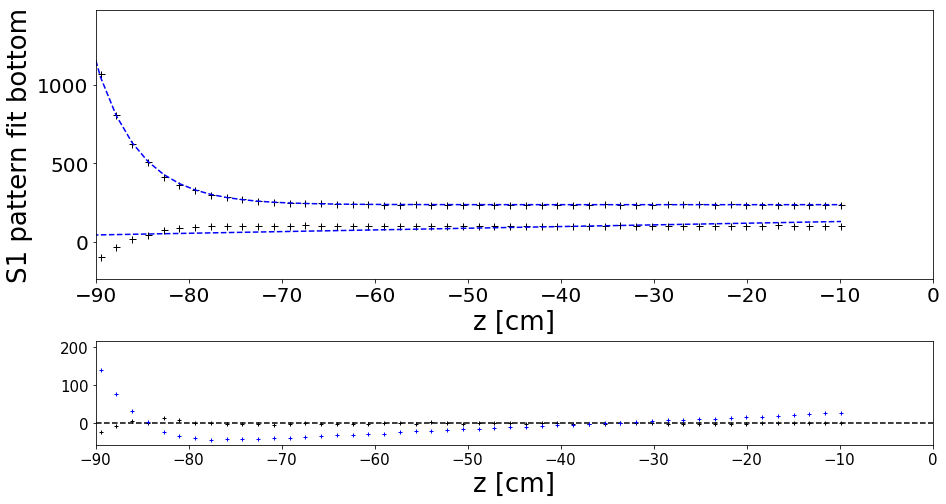

In [12]:
###################################################################################################
init_z = [2.16014992e+02, 9.26515951e-04, 1.69452500e-01]

popt_z, pcov_z = curve_fit(exp, xbins_center_valid_z, perc_valid_z, p0=init_z)
print('popt_z:\n ', popt_z ,'\n\npcov_z: \n', pcov_z)
###################################################################################################

###################################################################################################
init_z_low = [20, 0]
popt_z_low, pcov_z_low = curve_fit(poly1, xbins_center_valid_z, perc_valid_z_low, p0=init_z_low)
print('popt_z:\n ', popt_z_low ,'\n\npcov_z: \n', pcov_z_low)
###################################################################################################

plt.figure(figsize=(15,8))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.6)

plt.subplot(grid[:2, :])
plt.plot(xbins_center_valid_z, perc_valid_z, 'k+', ms = 7)
plt.plot(xbins_center_valid_z, exp(xbins_center_valid_z, *popt_z), 'b--')
plt.plot(xbins_center_valid_z, perc_valid_z_low, 'k+', ms = 7)
plt.plot(xbins_center_valid_z, poly1(xbins_center_valid_z, *popt_z_low), 'b--')
plt.xlim(-90,0)

plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(grid[2, :])
plt.plot(xbins_center_valid_z, exp(xbins_center_valid_z, *popt_z) - perc_valid_z, 'k+', ms=4)
plt.plot(xbins_center_valid_z, poly1(xbins_center_valid_z, *popt_z_low) - perc_valid_z_low, 'b+', ms=4)

plt.hlines(y=0, xmin=-90, xmax = 0 , linestyles='dashed')
plt.xlim(-90,0)
plt.xlabel('z [cm]', fontsize=26)
plt.tick_params(labelsize=15)

p_ , chi2_ = compute_chi2_p_2(perc_z,exp(xbins_center_valid_z, *popt_z), len(popt_z))

In [13]:
### Puliscono il sample su z

data_1['CutS1PF_z'] = (data_1['s1_pattern_fit_bottom_hax'] < exp(data_1['z_3d_nn_tf'], *popt_z)) \
                      &(data_1['s1_pattern_fit_bottom_hax'] > poly1(data_1['z_3d_nn_tf'], *popt_z_low))
data_cut_z = hax.cuts.selection(data_1, data_1['CutS1PF_z'] == True)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Unnamed selection: 18728 rows removed (95.89% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [14]:
###############################################
# Questi sono i dati che vengono considerati brutti per la definizione del cut rispetto al check su z
data_cut_z_BAD = hax.cuts.selection(data_1, data_1['CutS1PF_z'] == False)
###############################################

Unnamed selection: 437325 rows removed (4.11% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


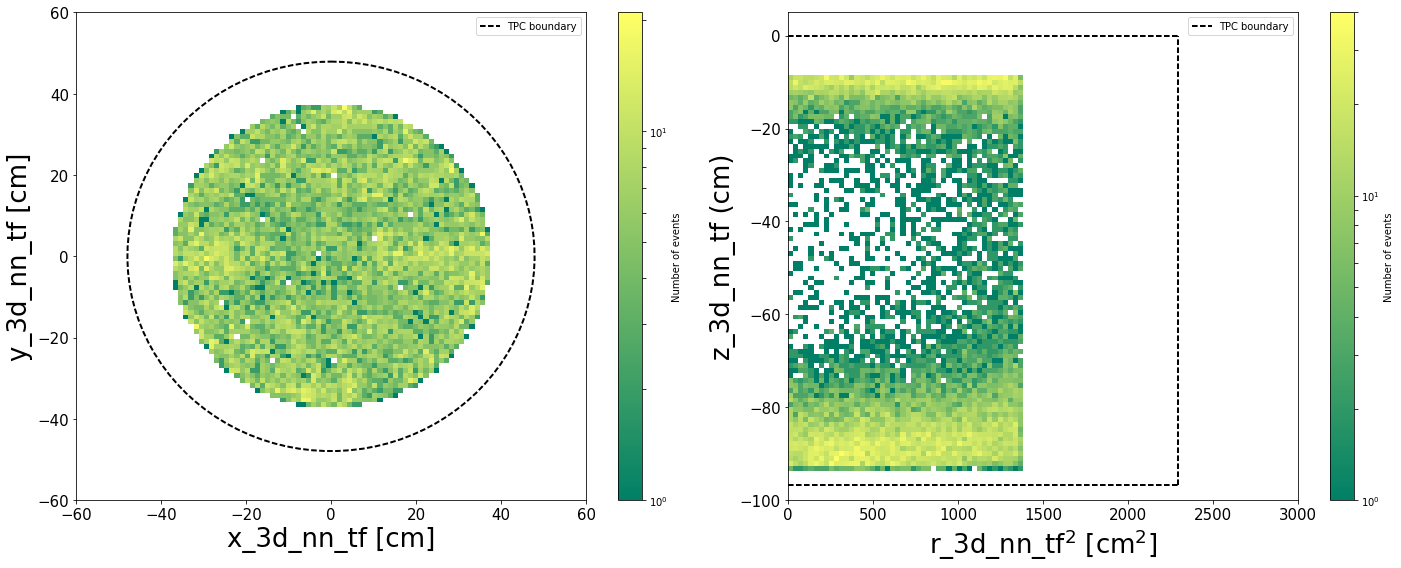

In [15]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.hist2d(data_cut_z_BAD['x_3d_nn_tf'], data_cut_z_BAD['y_3d_nn_tf'], 
           bins=(100,100), range=((-60,60), (-60,60)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt_circle(linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
#plt.xlim((-60,60))
#plt.ylim((-60,60))
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)
################################################

################################################
plt.subplot(122)
plt.hist2d((data_cut_z_BAD['r_3d_nn_tf']**2), data_cut_z_BAD['z_3d_nn_tf'], 
           bins=(100,100), 
           range=((0,3000), (-100,5)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


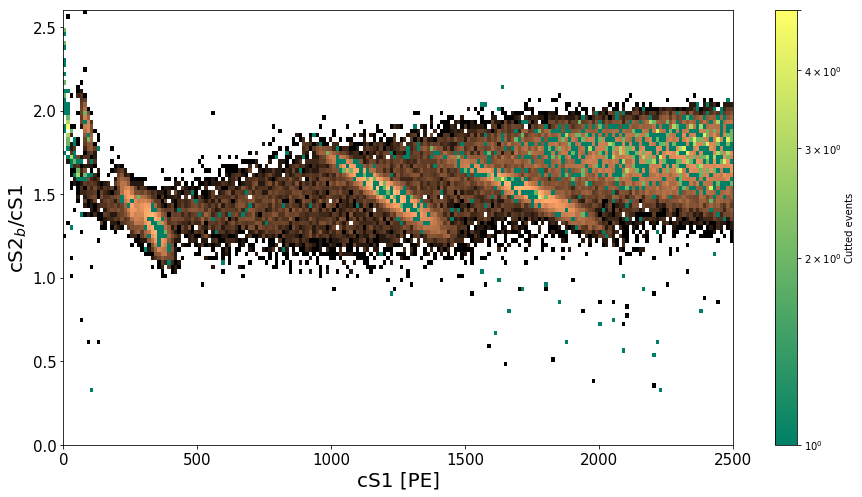

In [16]:
plt.figure(figsize=(15,8))

###################################################################################################
#plt.subplot(211)
xbins = np.linspace(0, 2.5e3, 200)
ybins = np.linspace(0, np.log10(4e2), 100)

plt.hist2d(data_cut_z['cs1_nn_tf'], np.log10(data_cut_z['cs2_bottom_nn_tf']/data_cut_z['cs1_nn_tf']), 
           bins=[xbins, ybins], 
           #range=((0,1.5e5), (0,5e3)), 
           cmap=plt.cm.copper, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.hist2d(data_cut_z_BAD['cs1_nn_tf'], np.log10(data_cut_z_BAD['cs2_bottom_nn_tf']/data_cut_z_BAD['cs1_nn_tf']), 
           bins=[xbins, ybins], 
           #range=((0,1.5e5), (0,5e3)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Cutted events', orientation="vertical")
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('cS2$_b$/cS1', fontsize=20) 
plt.tick_params(labelsize=15)
###################################################################################################

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


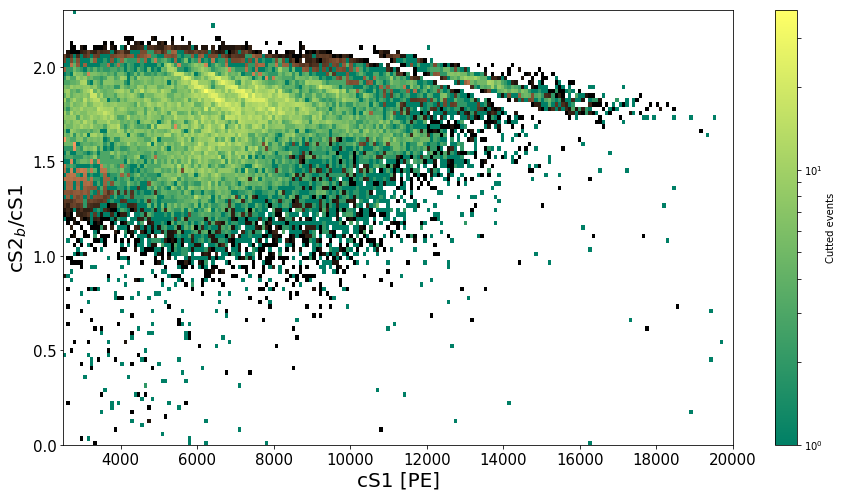

In [17]:
plt.figure(figsize=(15,8))

###################################################################################################
#plt.subplot(212)
xbins = np.linspace(2.5e3, 2e4, 200)
ybins = np.linspace(0, np.log10(2e2), 100)

plt.hist2d(data_cut_z['cs1_nn_tf'], np.log10(data_cut_z['cs2_bottom_nn_tf']/data_cut_z['cs1_nn_tf']), 
           bins=[xbins, ybins], 
           #range=((0,1.5e5), (0,5e3)), 
           cmap=plt.cm.copper, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.hist2d(data_cut_z_BAD['cs1_nn_tf'], np.log10(data_cut_z_BAD['cs2_bottom_nn_tf']/data_cut_z_BAD['cs1_nn_tf']),
           bins=[xbins, ybins], 
           #range=((0,1.5e5), (0,5e3)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Cutted events', orientation="vertical")
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('cS2$_b$/cS1', fontsize=20) 
plt.tick_params(labelsize=15)

###################################################################################################

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


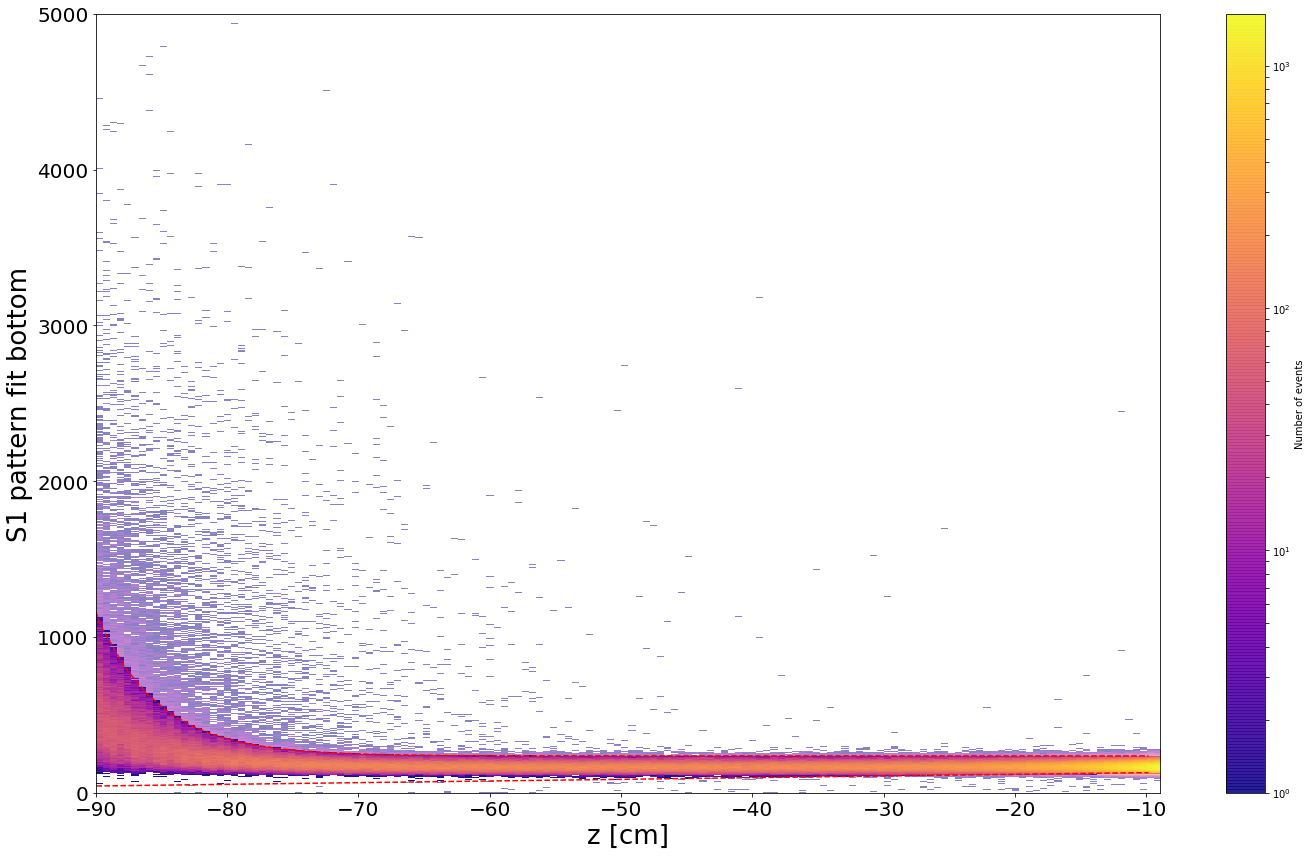

In [18]:
y_h = []
y_l = []
for i in range(len(xbins_center_z)):
    y_h.append(exp(xbins_center_z[i], *popt_z))
    y_l.append(poly1(xbins_center_z[i], *popt_z_low))
    
plt.figure(figsize=(20,12))
hist_z, xbins_z, ybins_z, _ = plt.hist2d(data_1['z_3d_nn_tf'], 
                                         data_1['s1_pattern_fit_bottom_hax'],
                                         bins=(150,800), 
                                         range=((-90, -9), (0.0,5000)), 
                                         cmap=plt.cm.plasma, 
                                         norm=matplotlib.colors.LogNorm(),
                                         cmin = 1,alpha = 0.5)
hist_z_cut, xbins_z_cut, ybins_z_cut, _ = plt.hist2d(data_cut_z['z_3d_nn_tf'], 
                                                     data_cut_z['s1_pattern_fit_bottom_hax'],
                                                     bins=(150,800), 
                                                     range=((-90, -9), (0.0,5000)), 
                                                     cmap=plt.cm.plasma, 
                                                     norm=matplotlib.colors.LogNorm(),
                                                     cmin = 1,alpha = 0.9)
plt.colorbar(label='Number of events')
plt.plot(xbins_center_z, y_h, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.plot(xbins_center_z, y_l, 'r--', label = 'S1 Pattern Likelihood Cut')
#plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


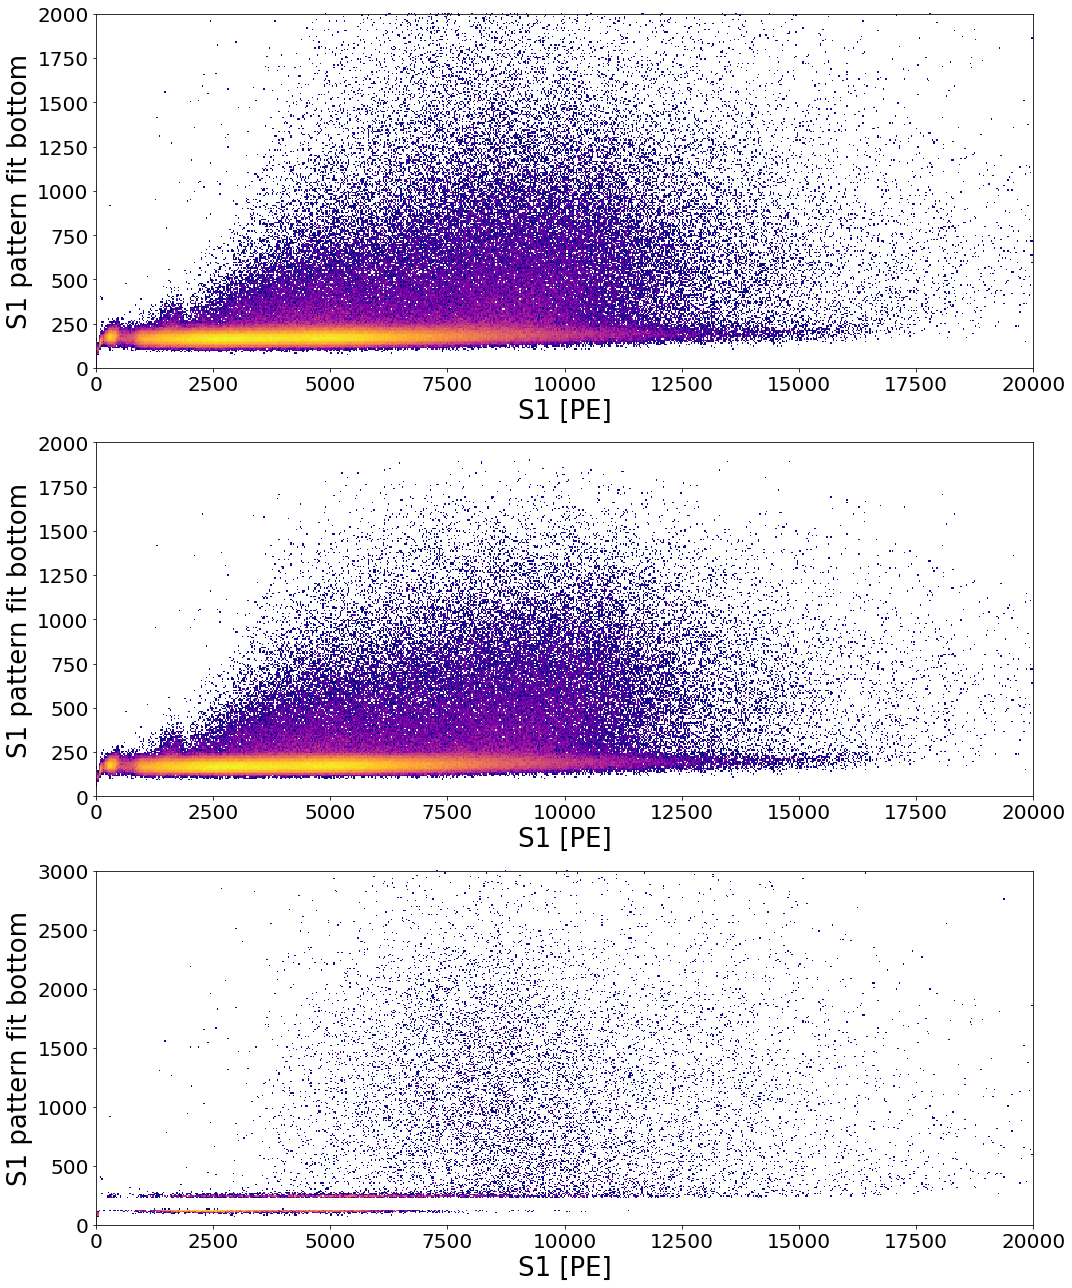

In [24]:
plt.figure(figsize=(15,18))
plt.subplot(311)
plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], bins = (700, 250), 
           range=((0,2e4), (0,2000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(312)
plt.hist2d(data_cut_z['s1'], data_cut_z['s1_pattern_fit_bottom_hax'], bins = (700, 250), 
           range=((0,2e4), (0,2000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(313)
plt.hist2d(data_cut_z_BAD['s1'], data_cut_z_BAD['s1_pattern_fit_bottom_hax'], bins = (700, 300), 
           range=((0,2e4), (0,3000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


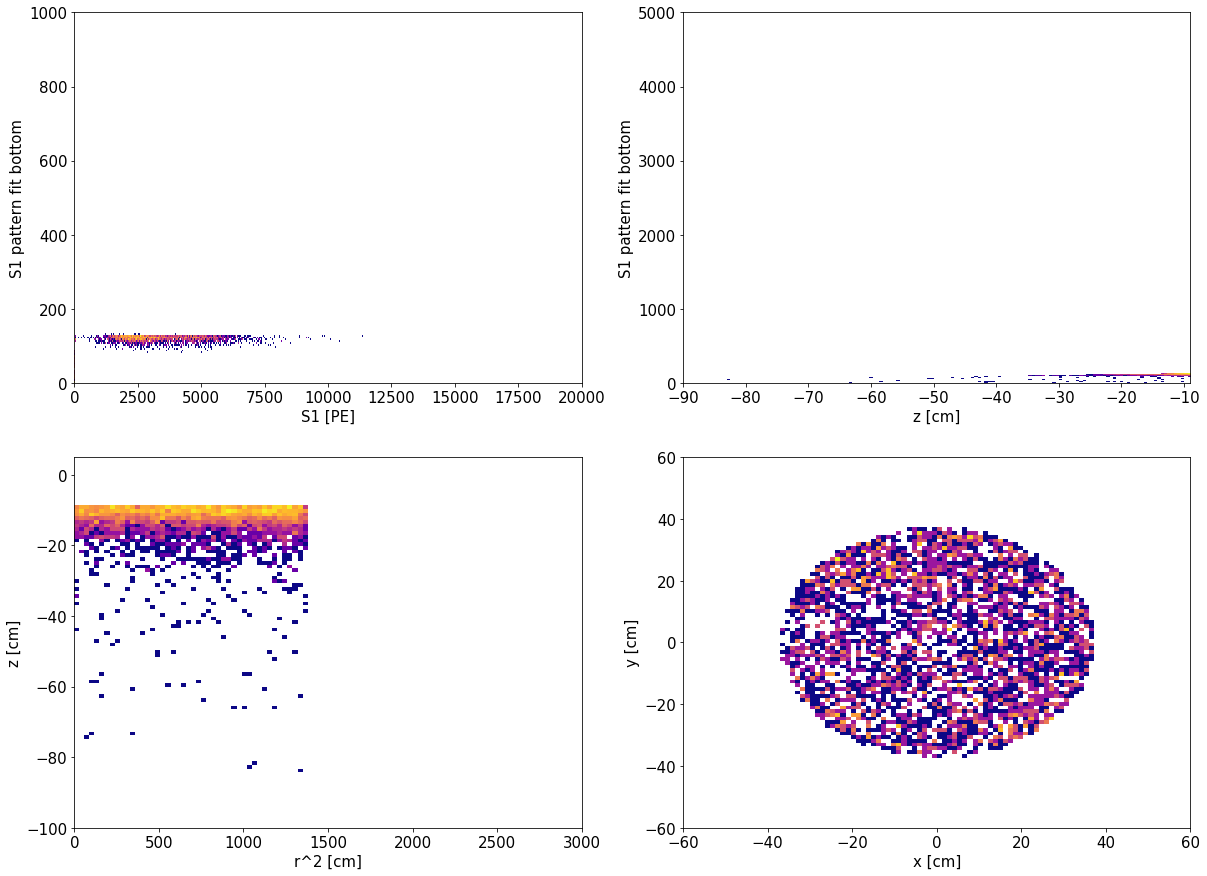

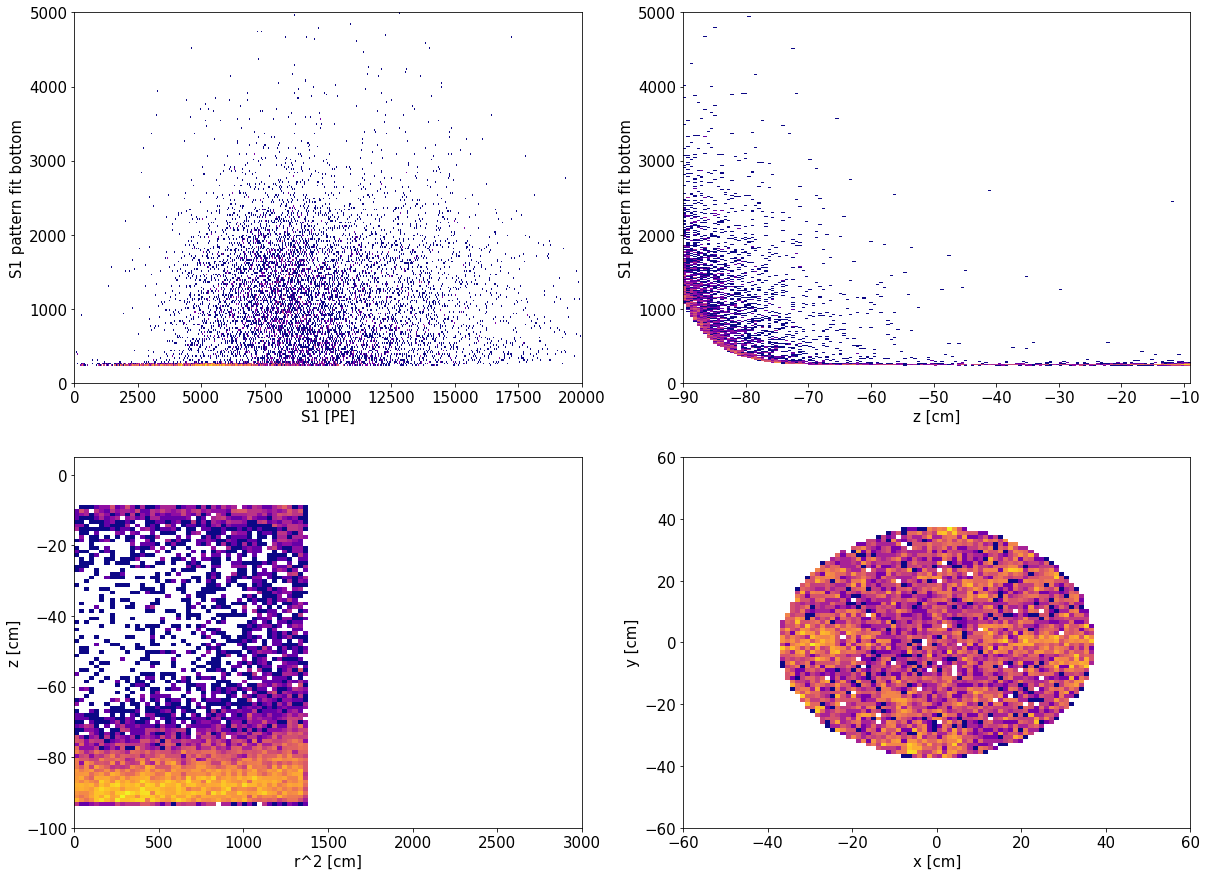

In [25]:
### Vediamo in s1 e z glie venti tagliati

plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.hist2d(data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']<200]['s1'], 
           data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']<200]['s1_pattern_fit_bottom_hax'], 
           bins = (700, 200), 
           range=((0,2e4), (0,1000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('S1 [PE]', fontsize=15)
plt.ylabel('S1 pattern fit bottom', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(222)
plt.hist2d(data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']<200]['z_3d_nn_tf'], 
           data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']<200]['s1_pattern_fit_bottom_hax'], 
           bins = (150, 800), 
           range=((-90, -9), (0, 5000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=15)
plt.ylabel('S1 pattern fit bottom', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(223)
plt.hist2d(data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']<200]['r_3d_nn_tf']**2, 
           data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']<200]['z_3d_nn_tf'], 
           bins = (100, 100), 
           range=((0,3000), (-100,5)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('r^2 [cm]', fontsize=15)
plt.ylabel('z [cm]', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(224)
plt.hist2d(data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']<200]['x_3d_nn_tf'], 
           data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']<200]['y_3d_nn_tf'], 
           bins = (100, 100), 
           range=((-60,60), (-60,60)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('x [cm]', fontsize=15)
plt.ylabel('y [cm]', fontsize=15)
plt.tick_params(labelsize=15)


plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.hist2d(data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']>200]['s1'], 
           data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']>200]['s1_pattern_fit_bottom_hax'], 
           bins = (700, 200), 
           range=((0,2e4), (0,5000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('S1 [PE]', fontsize=15)
plt.ylabel('S1 pattern fit bottom', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(222)
plt.hist2d(data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']>200]['z_3d_nn_tf'], 
           data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']>200]['s1_pattern_fit_bottom_hax'], 
           bins = (150, 800), 
           range=((-90, -9), (0, 5000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=15)
plt.ylabel('S1 pattern fit bottom', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(223)
plt.hist2d(data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']>200]['r_3d_nn_tf']**2, 
           data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']>200]['z_3d_nn_tf'], 
           bins = (100, 100), 
           range=((0,3000), (-100,5)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('r^2 [cm]', fontsize=15)
plt.ylabel('z [cm]', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(224)
plt.hist2d(data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']>200]['x_3d_nn_tf'], 
           data_cut_z_BAD[data_cut_z_BAD['s1_pattern_fit_bottom_hax']>200]['y_3d_nn_tf'], 
           bins = (100, 100), 
           range=((-60,60), (-60,60)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('x [cm]', fontsize=15)
plt.ylabel('y [cm]', fontsize=15)
plt.tick_params(labelsize=15)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


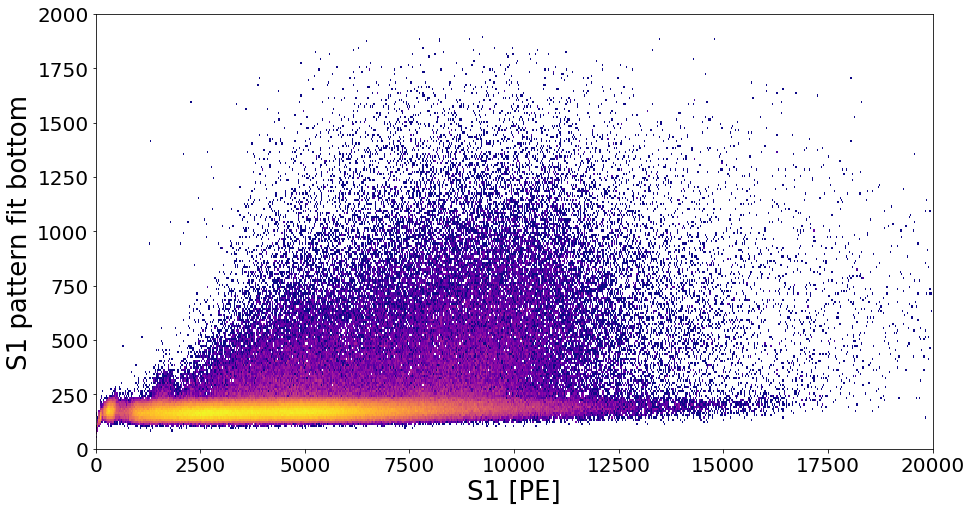

In [26]:
plt.figure(figsize=(15,8))
plt.hist2d(data_cut_z['s1'], data_cut_z['s1_pattern_fit_bottom_hax'], bins = (700, 200), 
           range=((0,2e4), (0,2000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

# Cut on S1

In [27]:
#############################################################################################################################
x = np.linspace(0,600, 20)
y = np.linspace(0, 2000, 200)

hist_1, xbins_1, ybins_1 = np.histogram2d(data_cut_z['s1'], data_cut_z['s1_pattern_fit_bottom_hax'], 
                                          bins = (x,y))
ybins_center_1 = [0.5*(ybins_1[i]+ybins_1[i+1]) for i in range(len(ybins_1)-1)]
xbins_center_1 = [0.5*(xbins_1[i]+xbins_1[i+1]) for i in range(len(xbins_1)-1)]

perc_1 = np.empty(len(xbins_center_1))
for i in tqdm(range(len(hist_1))):
    perc_1[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                           q=0.997, var1='s1', var2='s1 patter fit hax')
    
xbins_center_valid_1, perc_valid_1 = dropNaNforFit(xbins_center_1, perc_1)
xbins_center_valid_1, perc_valid_1 = dropNegforFit(xbins_center_valid_1, perc_valid_1)
#############################################################################################################################

#############################################################################################################################
x = np.linspace(600, 1.2e4, 50)
y = np.linspace(0, 2000, 300)
hist_2, xbins_2, ybins_2 = np.histogram2d(data_cut_z['s1'], data_cut_z['s1_pattern_fit_bottom_hax'],
                                          bins= (x,y))
ybins_center_2 = [0.5*(ybins_2[i]+ybins_2[i+1]) for i in range(len(ybins_2)-1)]
xbins_center_2 = [0.5*(xbins_2[i]+xbins_2[i+1]) for i in range(len(xbins_2)-1)]

perc_2 = np.empty(len(xbins_center_2))
for i in tqdm(range(len(hist_2))):
    perc_2[i] = percentile(index = i, hist=hist_2, ybins=ybins_2, xbins=xbins_2, 
                           q=0.997, var1='s1', var2='s1 patter fit bottom hax')
    
xbins_center_valid_2, perc_valid_2 = dropNaNforFit(xbins_center_2, perc_2)
xbins_center_valid_2, perc_valid_2 = dropNegforFit(xbins_center_valid_2, perc_valid_2)
#############################################################################################################################

#############################################################################################################################
x = np.linspace(1.2e4, 1.5e4, 5)
y = np.linspace(0, 2000, 300)
hist_3, xbins_3, ybins_3 = np.histogram2d(data_cut_z['s1'], data_cut_z['s1_pattern_fit_bottom_hax'],
                                          bins = (x, y))
ybins_center_3 = [0.5*(ybins_3[i]+ybins_3[i+1]) for i in range(len(ybins_3)-1)]
xbins_center_3 = [0.5*(xbins_3[i]+xbins_3[i+1]) for i in range(len(xbins_3)-1)]

perc_3 = np.empty(len(xbins_center_3))
for i in tqdm(range(len(hist_3))):
    perc_3[i] = percentile(index = i, hist=hist_3, ybins=ybins_3, xbins=xbins_3, 
                           q=0.997, var1='s1', var2='s1 patter fit bottom hax')
    
xbins_center_valid_3, perc_valid_3 = dropNaNforFit(xbins_center_3, perc_3)
xbins_center_valid_3, perc_valid_3 = dropNegforFit(xbins_center_valid_3, perc_valid_3)
#############################################################################################################################

xbins_center_valid = np.concatenate((xbins_center_valid_1, xbins_center_valid_2, xbins_center_valid_3))
perc_valid = np.concatenate((perc_valid_1, perc_valid_2, perc_valid_3))

100%|██████████| 4/4 [00:00<00:00, 10.38it/s]


In [39]:
perc_valid[60], xbins_center_valid[60]

(286.83499242378156, 10255.102040816326)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


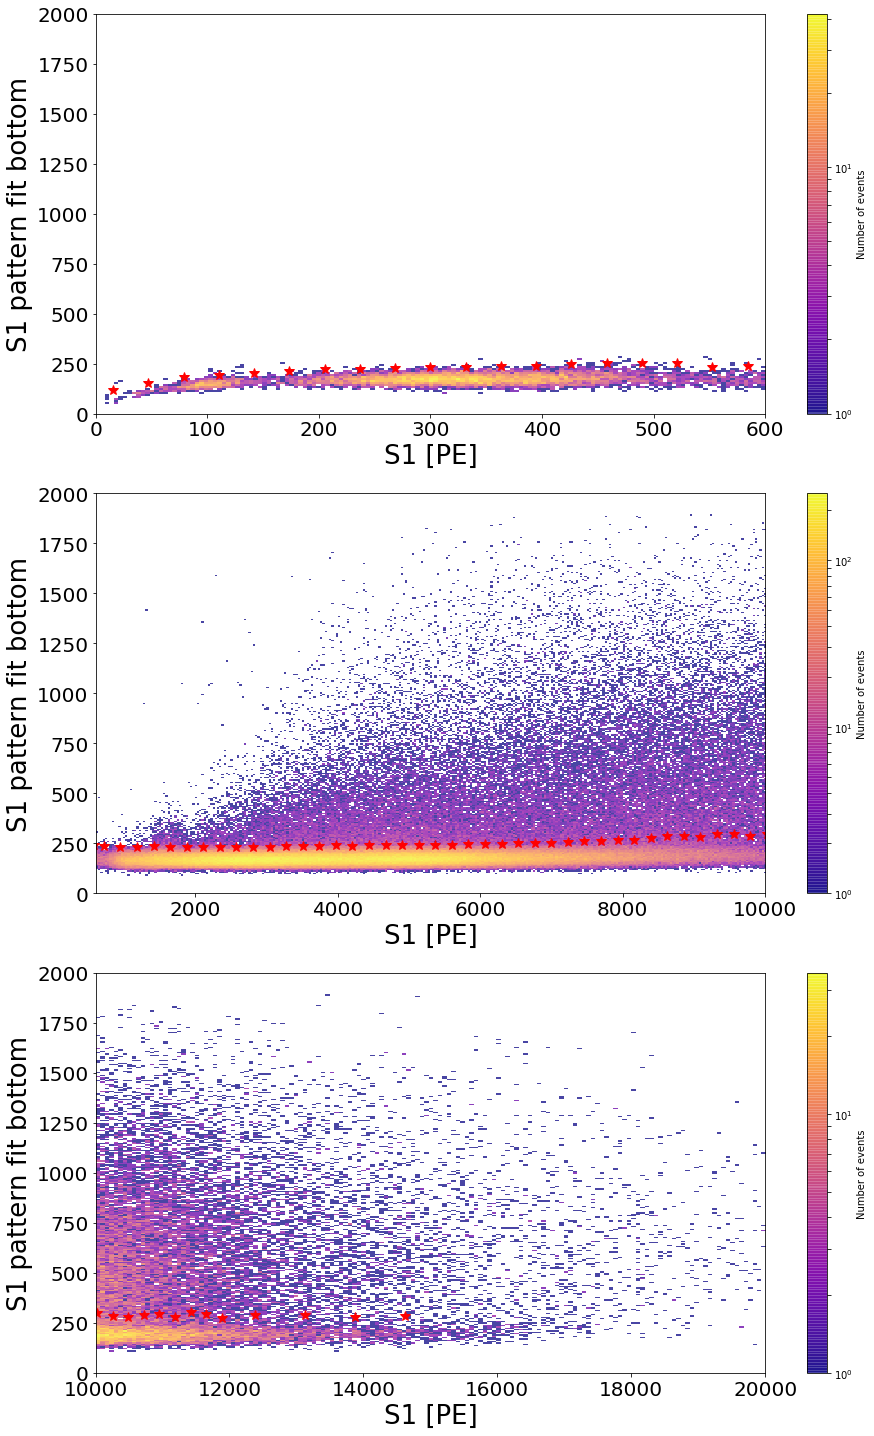

In [28]:
plt.figure(figsize=(15,25))

#############################################################################################################################
plt.subplot(311)
x = np.linspace(0, 600, 150)
y = np.linspace(0, 2000, 200)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut_z['s1'], data_cut_z['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y], 
                                               #range=((0,2e4), (0,2000)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 0.75)
plt.colorbar(label='Number of events')
plt.plot(xbins_center_valid_1, perc_valid_1, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_3, perc_valid_3, 'r*', lw=2, ms=10)

plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
#############################################################################################################################

#############################################################################################################################
plt.subplot(312)
x = np.linspace(600, 1e4, 300)
y = np.linspace(0, 2000, 300)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut_z['s1'], data_cut_z['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y], 
                                               #range=((0,2e4), (0,2000)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 0.75)
plt.colorbar(label='Number of events')
plt.plot(xbins_center_valid_1, perc_valid_1, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_3, perc_valid_3, 'r*', lw=2, ms=10)

plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
#############################################################################################################################

#############################################################################################################################
plt.subplot(313)
x = np.linspace(1e4, 2e4, 150)
y = np.linspace(0, 2000, 300)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut_z['s1'], data_cut_z['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y], 
                                               #range=((0,2e4), (0,2000)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 0.75)
plt.colorbar(label='Number of events')
plt.plot(xbins_center_valid_1, perc_valid_1, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_3, perc_valid_3, 'r*', lw=2, ms=10)

plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
#############################################################################################################################

plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


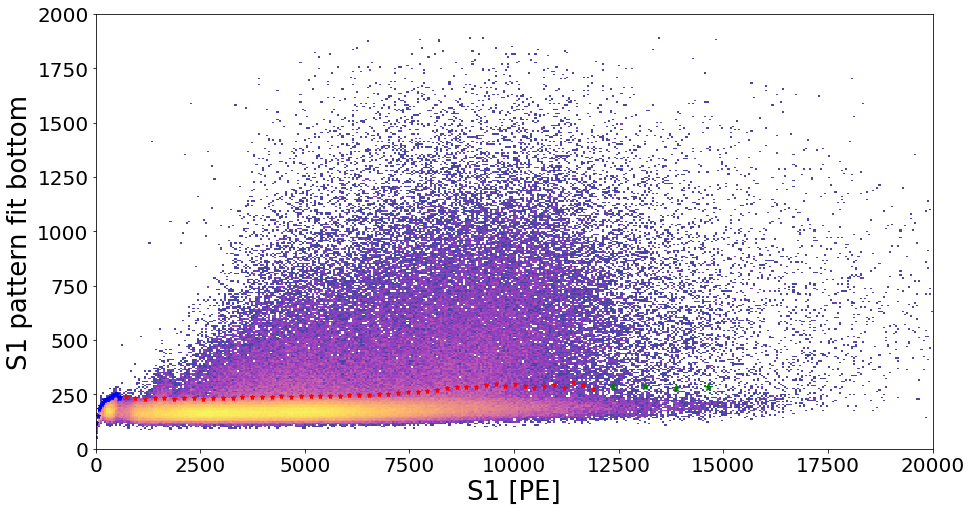

In [29]:
plt.figure(figsize=(15,8))
x = np.linspace(0, 2e4, 400)
y = np.linspace(0, 2000, 300)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut_z['s1'], data_cut_z['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y], 
                                               #range=((0,2e4), (0,2000)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 0.75)
#plt.colorbar(label='Number of events')
plt.plot(xbins_center_valid_1, perc_valid_1, 'b*', lw=2, ms=5)
plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=5)
plt.plot(xbins_center_valid_3, perc_valid_3, 'g*', lw=2, ms=8)

plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [46]:
xbins_center_valid[:18]

array([ 15.78947368,  47.36842105,  78.94736842, 110.52631579,
       142.10526316, 173.68421053, 205.26315789, 236.84210526,
       268.42105263, 300.        , 331.57894737, 363.15789474,
       394.73684211, 426.31578947, 457.89473684, 489.47368421,
       521.05263158, 552.63157895])

popt_1: 
 [ 5.26272437e+01  1.85004748e+01 -5.34039715e-01  4.14707986e-03] 

pcov_1: 
 [[ 3.36164994e+02 -8.47230757e+01  6.22232160e+00 -1.39239786e-01]
 [-8.47230757e+01  2.29431773e+01 -1.75525615e+00  4.03288403e-02]
 [ 6.22232160e+00 -1.75525615e+00  1.38112178e-01 -3.23821647e-03]
 [-1.39239786e-01  4.03288403e-02 -3.23821647e-03  7.71205857e-05]]
------ My function ------
######
Degrees of freedom
14
######
Chi2 value
92.2475193933223
######
Critical value
22.36203249482694
######
P value
5.184741524999481e-14

popt_2: 
 [2.18326858e+02 1.47501163e+02 4.28495697e-05] 

pcov_2: 
 [[ 1.66271634e+01  2.72321864e+02 -1.04050375e-04]
 [ 2.72321864e+02  1.11847440e+04 -3.88790695e-03]
 [-1.04050375e-04 -3.88790695e-03  1.36238970e-09]]
------ My function ------
######
Degrees of freedom
51
######
Chi2 value
396.95171720460775
######
Critical value
67.5048065495412
######
P value
0.0


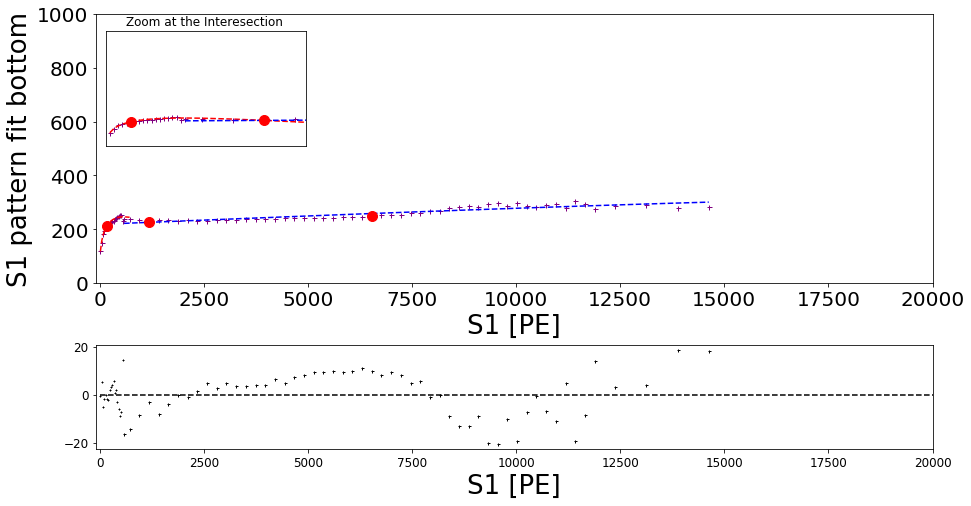

In [30]:
#############################################################################################################################
init_1 = [1.37309245e+01,  2.52014490e+01, -1.00423678e+00,  1.31231589e-02]

popt_1, pcov_1 = curve_fit(S1PatternLikelihoodProfile_1, xbins_center_valid[:18], perc_valid[:18], p0=init_1)
print('popt_1: \n', popt_1 ,'\n\npcov_1: \n', pcov_1)
p_1 , chi2_1 = compute_chi2_p_2(perc_valid[:18], 
                                S1PatternLikelihoodProfile_1(perc_valid[:18], *popt_1), 
                                len(popt_1))
#############################################################################################################################

#############################################################################################################################
init_2 = [2.18913537e+02, 1.19372945e+02, 5.32572959e-05]

popt_2, pcov_2 = curve_fit(S1arctan, xbins_center_valid[18:], perc_valid[18:], p0=init_2)
print('\npopt_2: \n',popt_2, '\n\npcov_2: \n', pcov_2)
p_2 , chi2_2 = compute_chi2_p_2(perc_valid[18:], 
                                S1arctan(perc_valid[18:], *popt_2), 
                                len(popt_2))
#############################################################################################################################

#############################################################################################################################
idx = np.argwhere(np.diff(np.sign(S1PatternLikelihoodProfile_1(xbins_center_valid, *popt_1) - \
                                  S1arctan(xbins_center_valid, *popt_2)))).flatten()

#############################################################################################################################

plt.figure(figsize=(15,8))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.6)

#############################################################################################################################
plt.subplot(grid[:2, :])

plt.plot(xbins_center_valid[:], perc_valid[:], '+', ms=5, c='purple')
plt.plot(xbins_center_valid[:20], S1PatternLikelihoodProfile_1(xbins_center_valid[:20], *popt_1), 'r--')
plt.plot(xbins_center_valid[18:], S1arctan(xbins_center_valid[18:], *popt_2), 'b--')
plt.plot(xbins_center_valid[idx], S1PatternLikelihoodProfile_1(xbins_center_valid[idx], *popt_1), 'ro' , ms=10)
plt.xlim(-100, 2e4)
plt.ylim(0,1000)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.axes([0.135, 0.65, .185, .2], facecolor='w')
plt.plot(xbins_center_valid[:], perc_valid[:], '+', ms=5, c='purple')
plt.plot(xbins_center_valid[:25], S1PatternLikelihoodProfile_1(xbins_center_valid[:25], *popt_1), 'r--')
plt.plot(xbins_center_valid[18:], S1arctan(xbins_center_valid[18:], *popt_2), 'b--')
plt.plot(xbins_center_valid[idx], S1PatternLikelihoodProfile_1(xbins_center_valid[idx], *popt_1), 'ro' , ms=10)
plt.xlim(-10, 15e2)
plt.ylim(0,1000)
plt.xticks([])
plt.yticks([])
plt.title('Zoom at the Interesection ')
#plt.xlabel('s1 [PE]')
#plt.ylabel('s1_pattern_fit_hax')
#############################################################################################################################

#############################################################################################################################
plt.subplot(grid[2, :]);
plt.plot(xbins_center_valid[:18], S1PatternLikelihoodProfile_1(xbins_center_valid[:18], *popt_1)-perc_valid[:18], 
         'k+', ms=2)
plt.plot(xbins_center_valid[18:], S1arctan(xbins_center_valid[18:], *popt_2)-perc_valid[18:], 
         'k+', ms=3)
plt.hlines(y=0, xmin=0, xmax=2e4, linestyles='dashed')
plt.xlim(-100, 2e4)
plt.xlabel('S1 [PE]', fontsize=26)
plt.tick_params(labelsize=12)
#############################################################################################################################

plt.show()

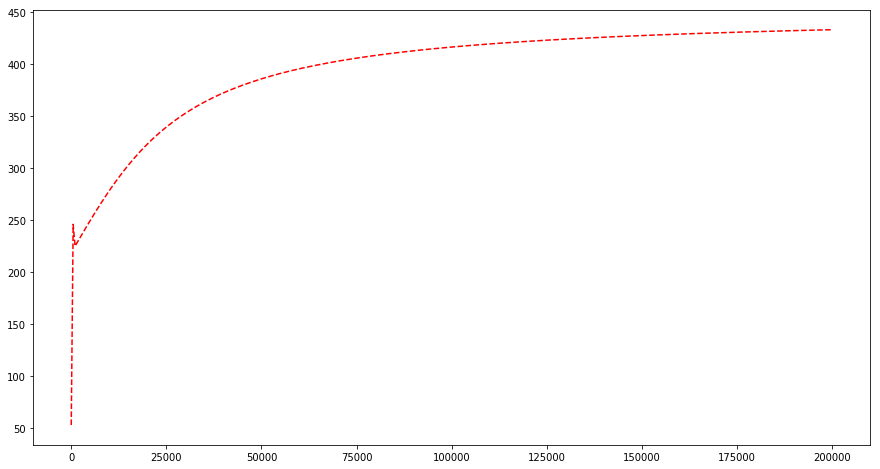

In [31]:
x = np.linspace(0, 2e5, 400)
y = []
for i in range(len(x)):
    y.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<600) + \
                 (S1arctan(x[i], *popt_2))*(x[i]>=600))

plt.figure(figsize=(15,8))
plt.plot(x, y, 'r--', label = 'S1 Pattern Likelihood Cut')

In [32]:
data_1['CutS1PL'] = (((data_1['s1_pattern_fit_bottom_hax'] < S1PatternLikelihoodProfile_1(data_1['s1'], *popt_1))*(data_1['s1']<600))
                      +((data_1['s1_pattern_fit_bottom_hax'] < S1arctan(data_1['s1'], *popt_2))*(data_1['s1']>=600)))
data_cut = hax.cuts.selection(data_1, data_1['CutS1PL'] == True)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

Unnamed selection: 85247 rows removed (81.31% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


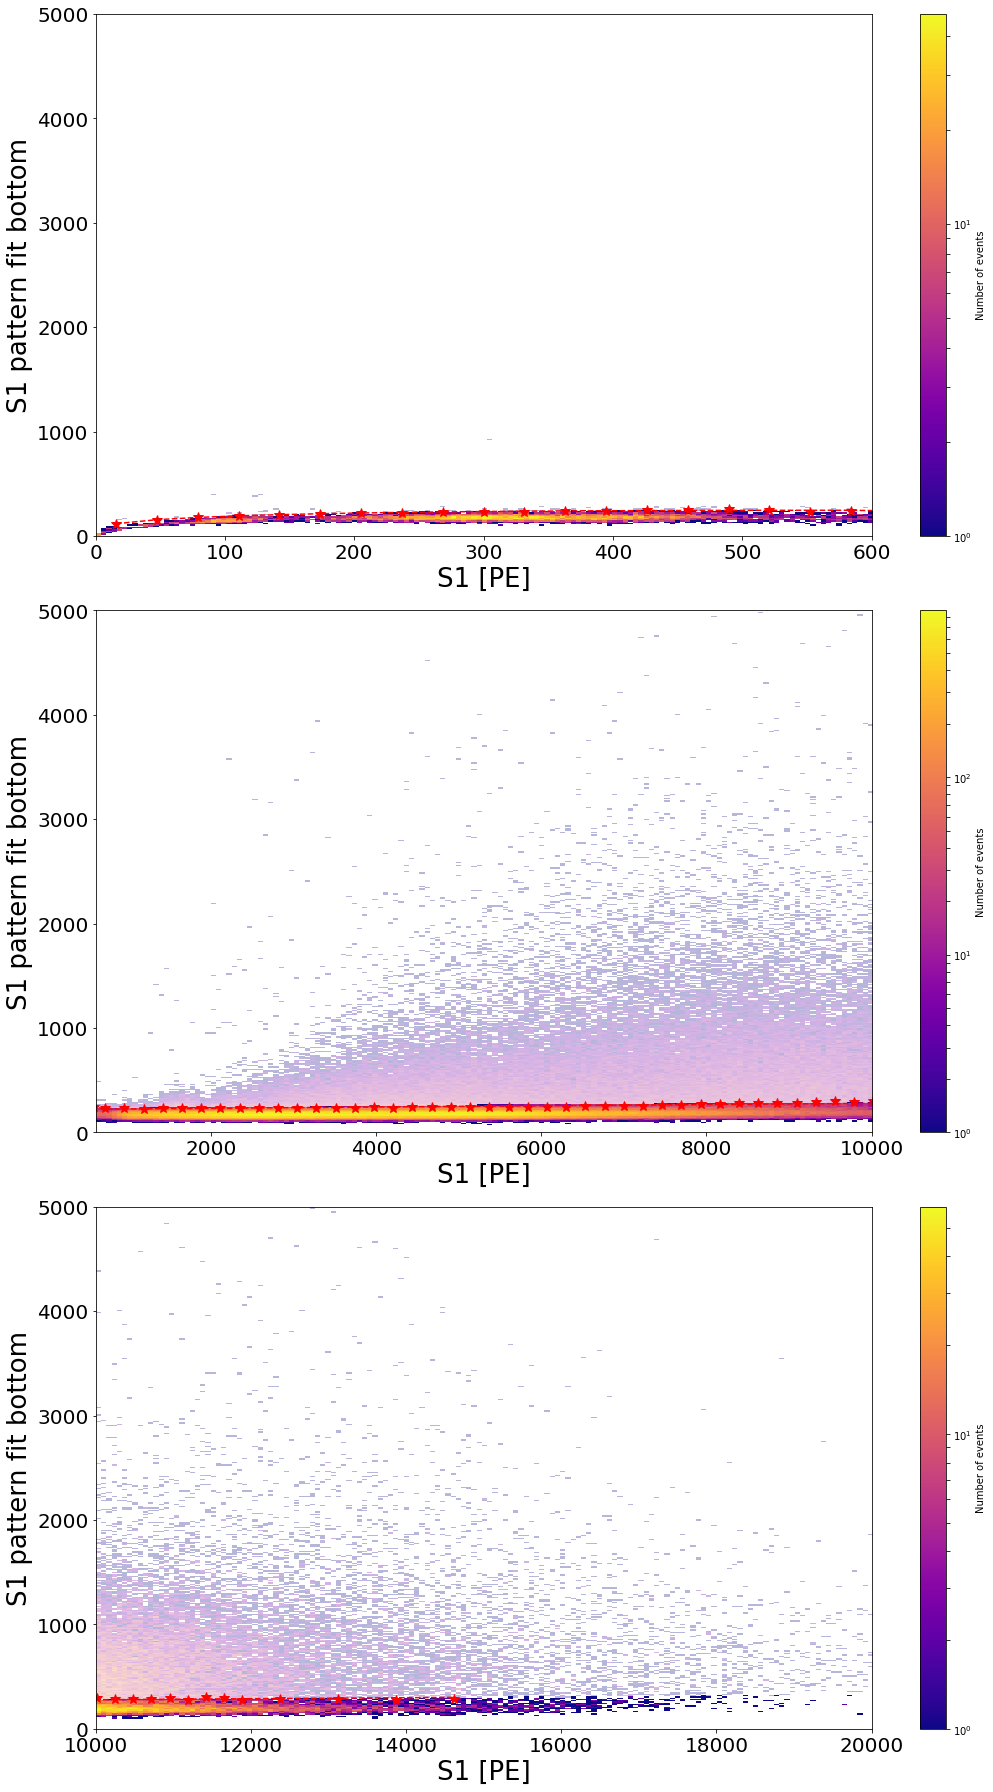

In [34]:
y_valid = []
for i in range(len(xbins_center_valid)):
    y_valid.append((S1PatternLikelihoodProfile_1(xbins_center_valid[i], *popt_1))*(xbins_center_valid[i]<600) + \
                 (S1arctan(xbins_center_valid[i], *popt_2))*(xbins_center_valid[i]>=600))

plt.figure(figsize=(15,25))

#############################################################################################################################
plt.subplot(311)
x = np.linspace(0,600, 150)
y = np.linspace(0, 5000, 400)
hist, xbins, ybins, _ = plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], 
                                   bins = [x,y], 
                                   #range=((0,2e4), (0,1500)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut['s1'], data_cut['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y], 
                                               #range=((0,2e4), (0,1500)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.plot(xbins_center_valid_1, perc_valid_1, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_3, perc_valid_3, 'r*', lw=2, ms=10)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
#############################################################################################################################

#############################################################################################################################
plt.subplot(312)
x = np.linspace(600, 1e4, 150)
y = np.linspace(0, 5000, 400)
hist, xbins, ybins, _ = plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], 
                                   bins = [x,y], 
                                   #range=((0,2e4), (0,1500)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut['s1'], data_cut['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y], 
                                               #range=((0,2e4), (0,1500)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.plot(xbins_center_valid_1, perc_valid_1, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_3, perc_valid_3, 'r*', lw=2, ms=10)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
#############################################################################################################################

#############################################################################################################################
plt.subplot(313)
x = np.linspace(1e4, 2e4, 150)
y = np.linspace(0, 5000, 400)
hist, xbins, ybins, _ = plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], 
                                   bins = [x,y], 
                                   #range=((0,2e4), (0,1500)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut['s1'], data_cut['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y], 
                                               #range=((0,2e4), (0,1500)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.plot(xbins_center_valid_1, perc_valid_1, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=10)
plt.plot(xbins_center_valid_3, perc_valid_3, 'r*', lw=2, ms=10)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
#############################################################################################################################

plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


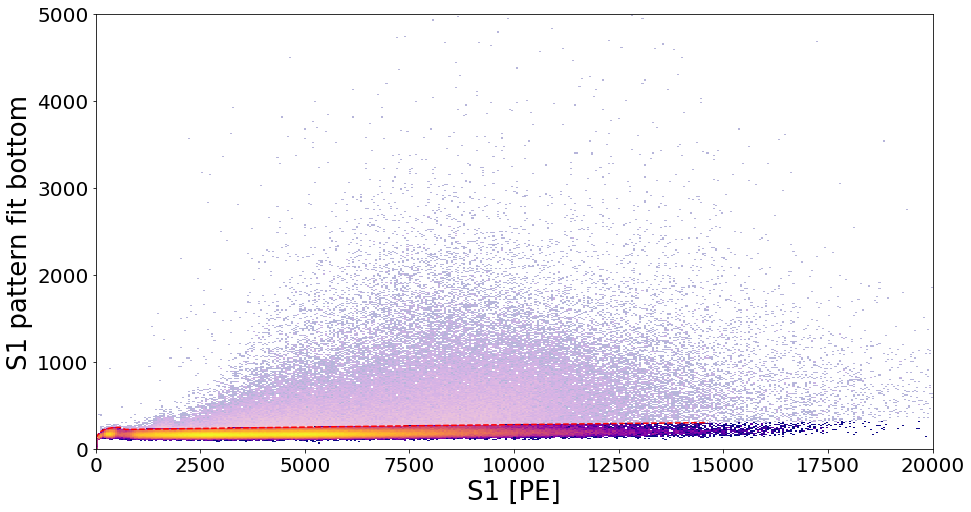

In [36]:
plt.figure(figsize=(15,8))
x = np.linspace(0, 2e4, 400)
y = np.linspace(0, 5000, 400)
hist, xbins, ybins, _ = plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], 
                                   bins = [x,y], 
                                   #range=((0,2e4), (0,1500)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut['s1'], data_cut['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y], 
                                               #range=((0,2e4), (0,1500)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 1)
#plt.colorbar(label='Number of events')
plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
#plt.plot(xbins_center_valid_1, perc_valid_1, 'r*', lw=2, ms=10)
#plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=10)
#plt.plot(xbins_center_valid_3, perc_valid_3, 'r*', lw=2, ms=10)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


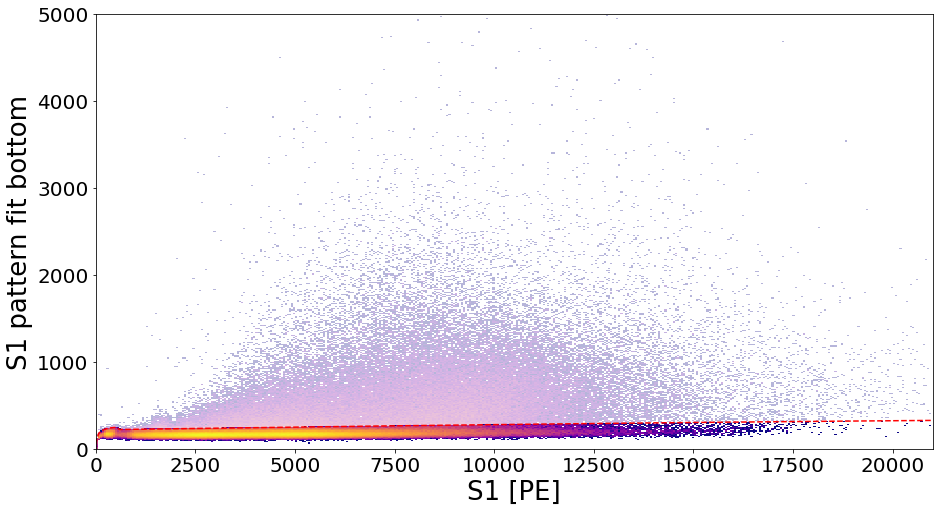

In [37]:
y_ = []
x_ = np.linspace(0,3e4, 400)
for i in range(len(x_)):
    y_.append((S1PatternLikelihoodProfile_1(x_[i], *popt_1))*(x_[i]<600) + \
                 (S1arctan(x_[i], *popt_2))*(x_[i]>=600))

plt.figure(figsize=(15,8))
x = np.linspace(0, 2.1e4, 400)
y = np.linspace(0, 5000, 400)
hist, xbins, ybins, _ = plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], 
                                   bins = [x,y], 
                                   #range=((0,2e4), (0,1500)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut['s1'], data_cut['s1_pattern_fit_bottom_hax'], 
                                               bins = [x,y], 
                                               #range=((0,2e4), (0,1500)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 1)
#plt.colorbar(label='Number of events')
plt.plot(x_, y_, 'r--', label = 'S1 Pattern Likelihood Cut')
#plt.plot(xbins_center_valid_1, perc_valid_1, 'r*', lw=2, ms=10)
#plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=10)
#plt.plot(xbins_center_valid_3, perc_valid_3, 'r*', lw=2, ms=10)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

29 30 29


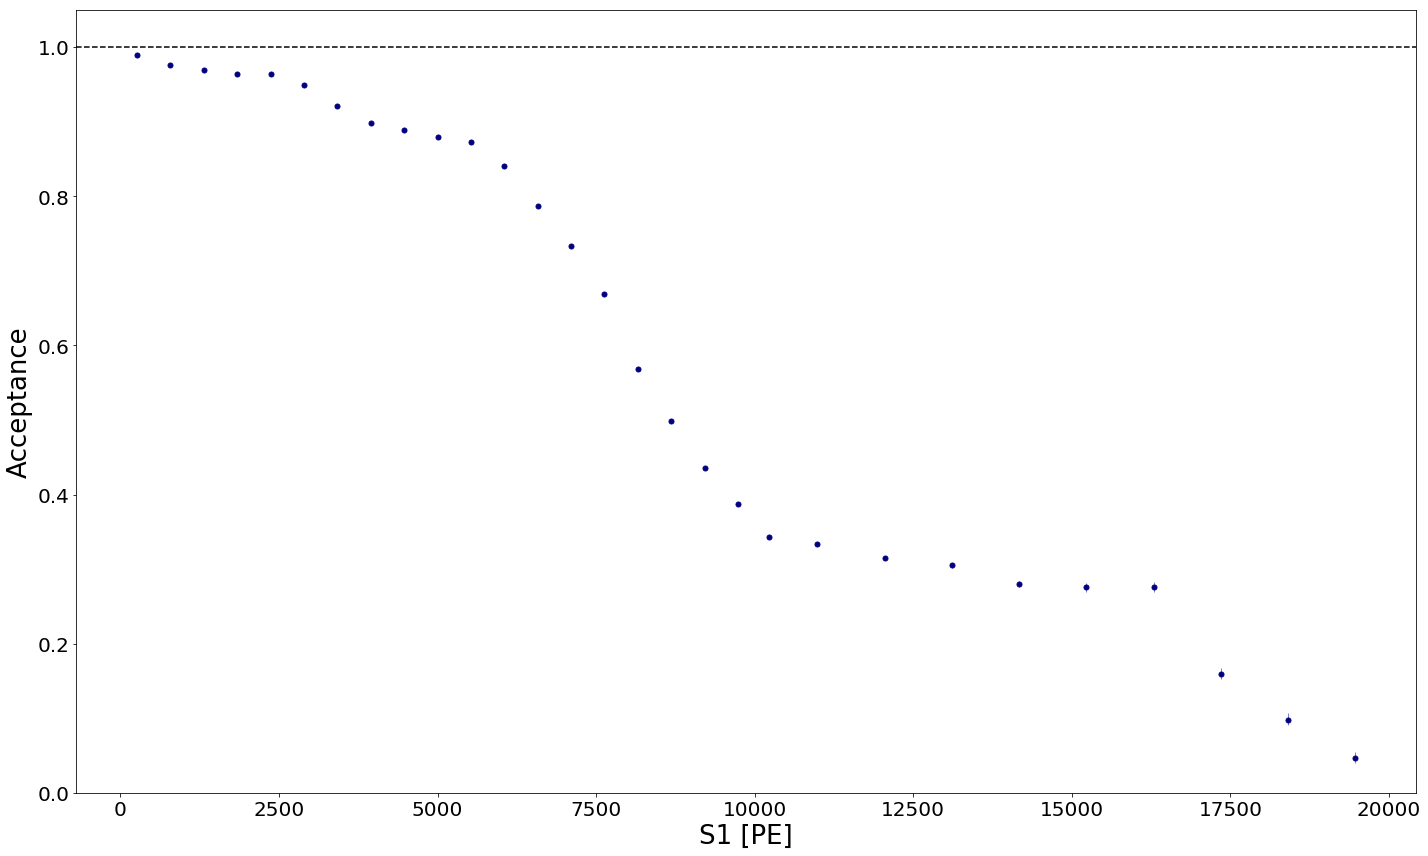

In [38]:
from statsmodels.stats.proportion import proportion_confint
binomial_error_method = 'wilson'
binomial_alpha = 0.68


def acceptance_2(data_before, data_after):
    after, bins=np.histogram(data_after ,bins=Bins) #range=hist_range)
    before, bins=np.histogram(data_before ,bins=Bins) #range=hist_range)

    acceptance = after/before
    error = proportion_confint(after, before, method=binomial_error_method, alpha=binomial_alpha)
    err_low = error[0]
    err_high = error[1]
    yerr_low, yerr_high = (acceptance - err_low, err_high - acceptance)
    err = (yerr_low, yerr_high)
    x = [0.5*(binn[i]+binn[i+1]) for i in range(len(binn)-1)]
    print(len(acceptance), len(binn), len(x))
    plt.errorbar(x, acceptance, err,0, marker='.', markersize=10, linestyle="", linewidth=0.5, color='navy')
    plt.axhline(y=1, color='k',linestyle='--')
    plt.ylabel('acceptance')
    plt.ylim(0,1.05)

#bin_1 = np.linspace(0, 570, 6)
bin_2 = np.linspace(0, 1e4, 20)
bin_3 = np.linspace(1.046e4, 2e4, 10)
binn = np.concatenate((bin_2, bin_3), axis=None)
Bins = binn
#binn=np.linspace(0,2e4,Bins)
fig = plt.figure(figsize=(20, 12))
acceptance_2(data_1['s1'], data_cut['s1'])
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('Acceptance', fontsize=26)
#plt.xscale('log')
#plt.legend(loc='best')
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

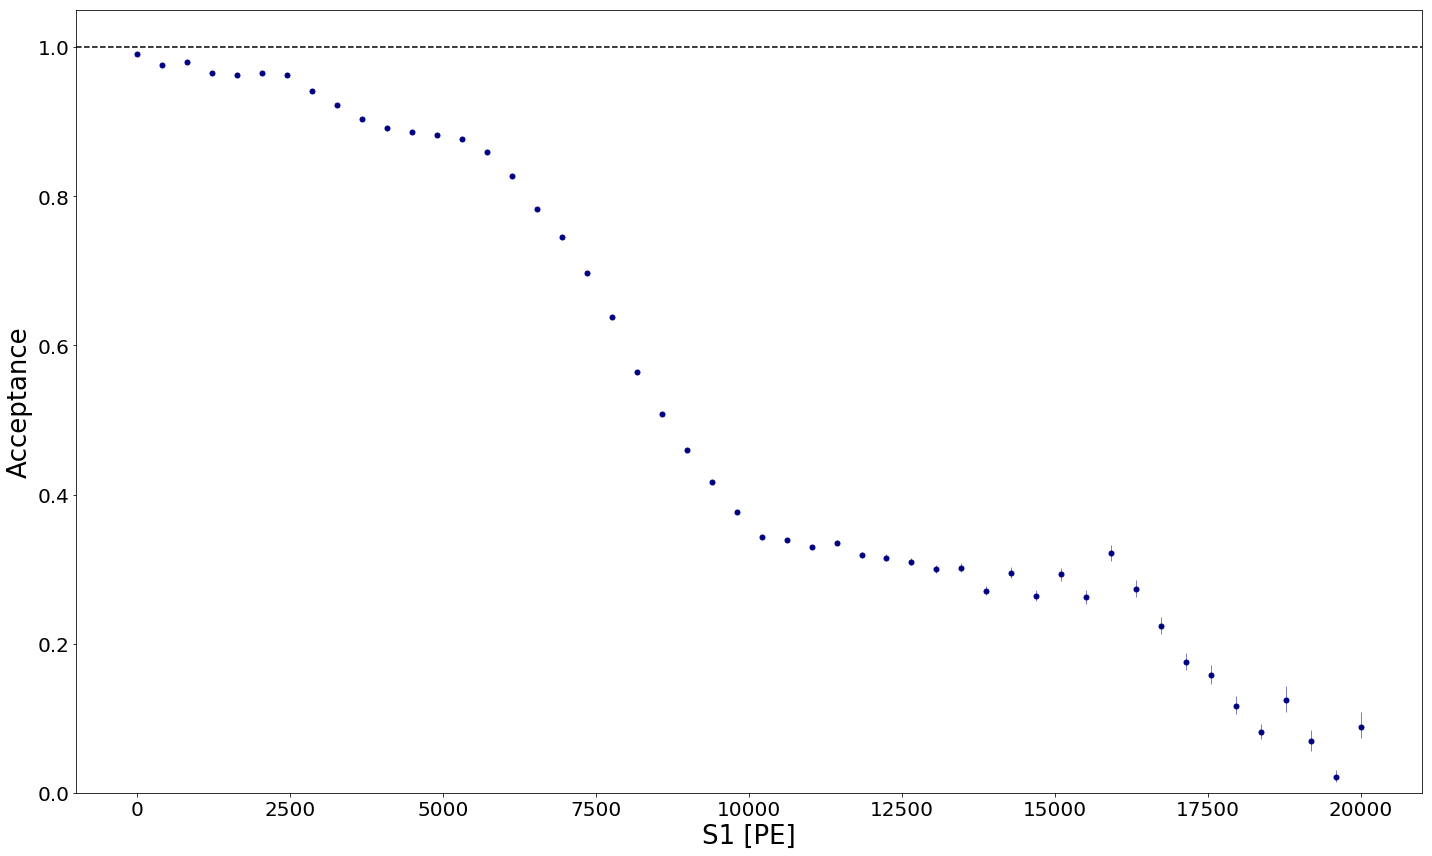

In [39]:
Bins=50
hist_range=([0,2e4])  
binn=np.linspace(0,2e4,Bins)
fig = plt.figure(figsize=(20, 12))
acceptance(data_1['s1'], data_cut['s1'])
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('Acceptance', fontsize=26)
#plt.xscale('log')
#plt.legend(loc='best')
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

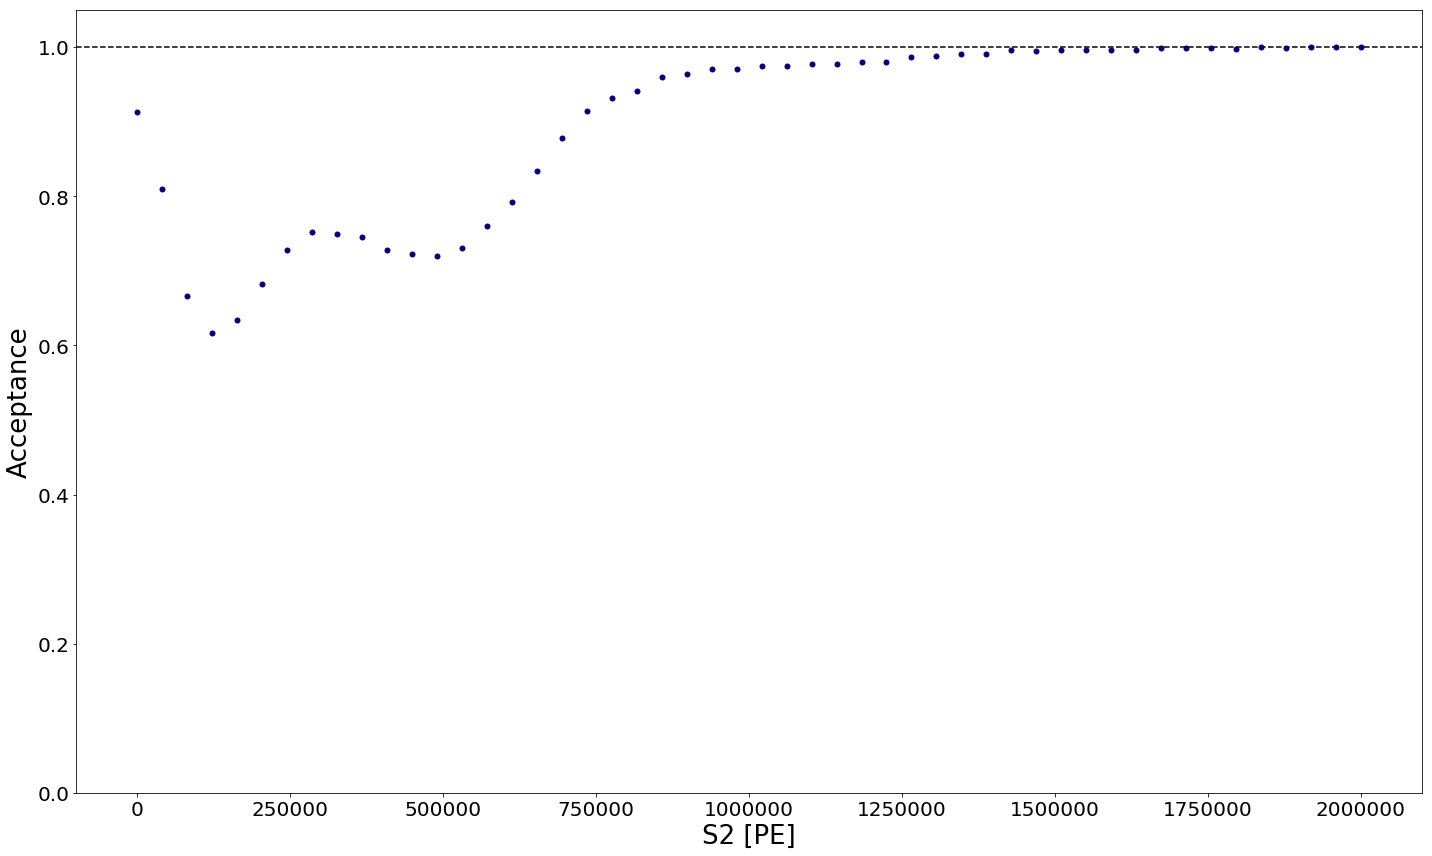

In [40]:
Bins=50
hist_range=([0,2e6])  
binn=np.linspace(0,2e6,Bins)
fig = plt.figure(figsize=(20, 12))
acceptance(data_1['s2'], data_cut['s2'])
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S2 [PE]', fontsize=26)
plt.ylabel('Acceptance', fontsize=26)
#plt.xscale('log')
#plt.legend(loc='best')
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

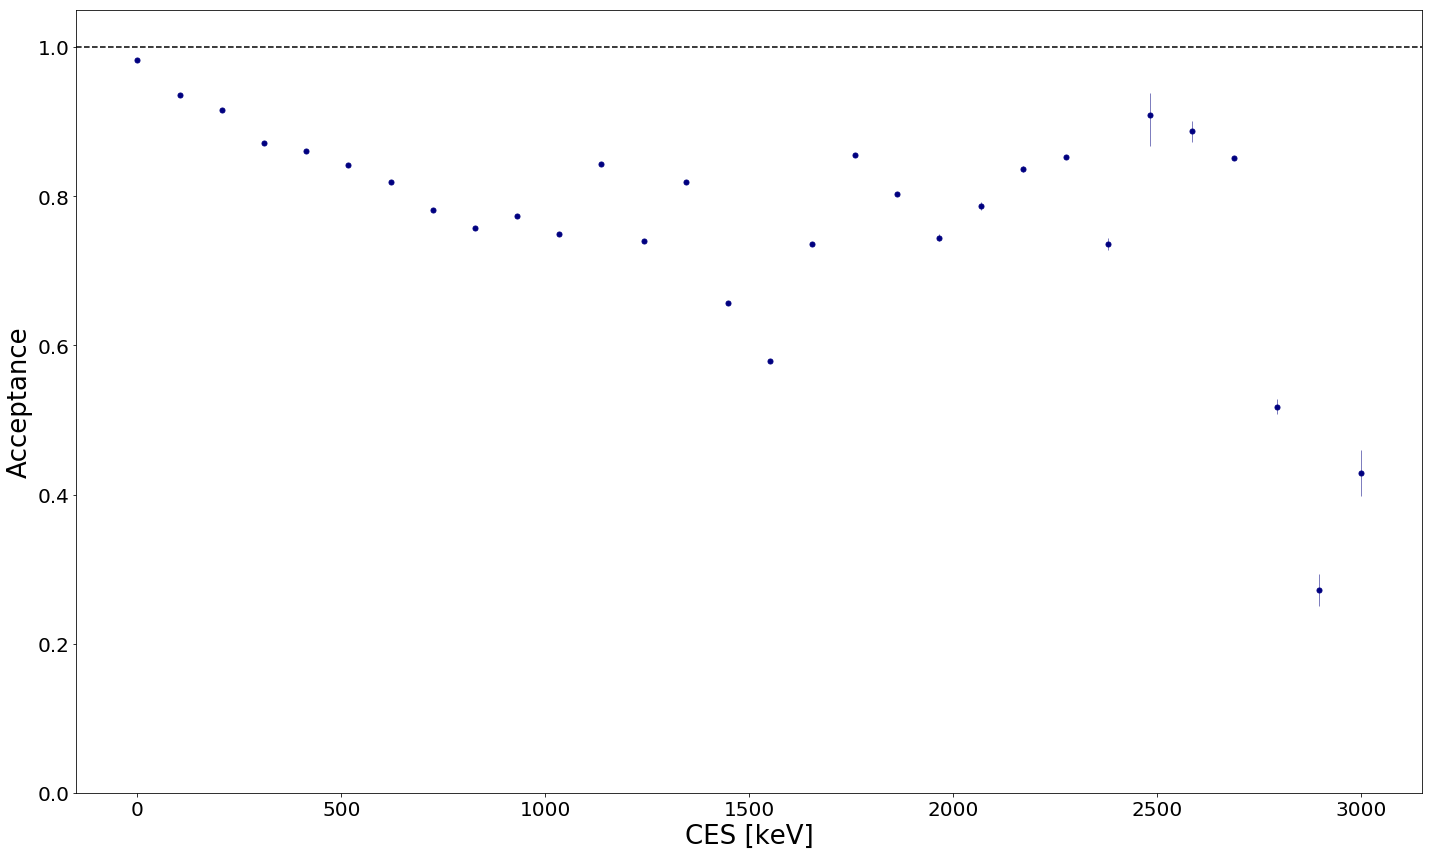

In [41]:
Bins=30
hist_range=([0,3e3])  
binn=np.linspace(0,3e3,Bins)
fig = plt.figure(figsize=(20, 12))
acceptance(data_1['CES']/10**3, data_cut['CES']/10**3)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('CES [keV]', fontsize=26)
plt.ylabel('Acceptance', fontsize=26)
#plt.xscale('log')
#plt.legend(loc='best')
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

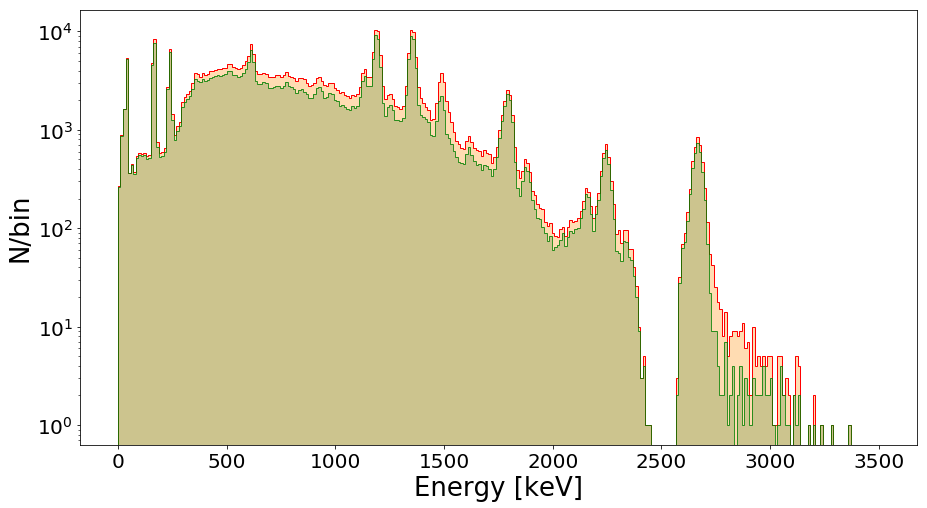

In [42]:
plt.figure(figsize=(15,8))
plt.hist(data_1['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data_1['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [keV]')
plt.ylabel('N/bin')
plt.yscale('log')
plt.tick_params(labelsize=20)

plt.hist(data_cut['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='bar', color='darkgreen',
         alpha = 0.2)
plt.hist(data_cut['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='step', color='green',
         alpha = 0.8)
plt.xlabel('Energy [keV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')
plt.tick_params(labelsize=20)

#plt.title('Spectrum NG data with the cut only on S1', fontsize=30)

In [ ]:
data_cut_bad = hax.cuts.selection(data_cut_z, data_cut_z['CutS1PL'] == False) #dati brutti

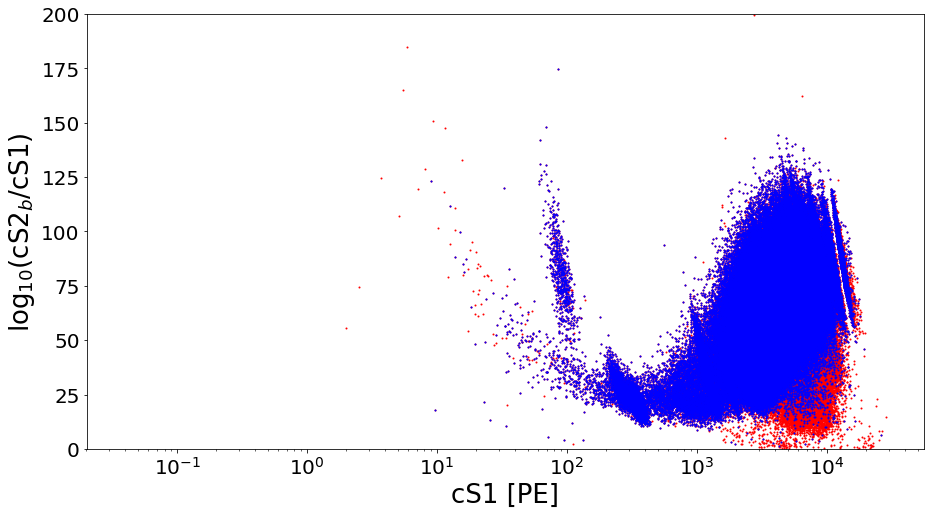

In [65]:
plt.figure(figsize=(15,8))
plt.plot(data_1['cs1_nn_tf'], data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf'],
         'ro', ms=1)
plt.plot(data_cut['cs1_nn_tf'], data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf'],
         'bo', ms=1)
plt.ylim(0,200)
plt.xscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('log$_{10}$(cS2$_b$/cS1)', fontsize=26)
plt.tick_params(labelsize=20)

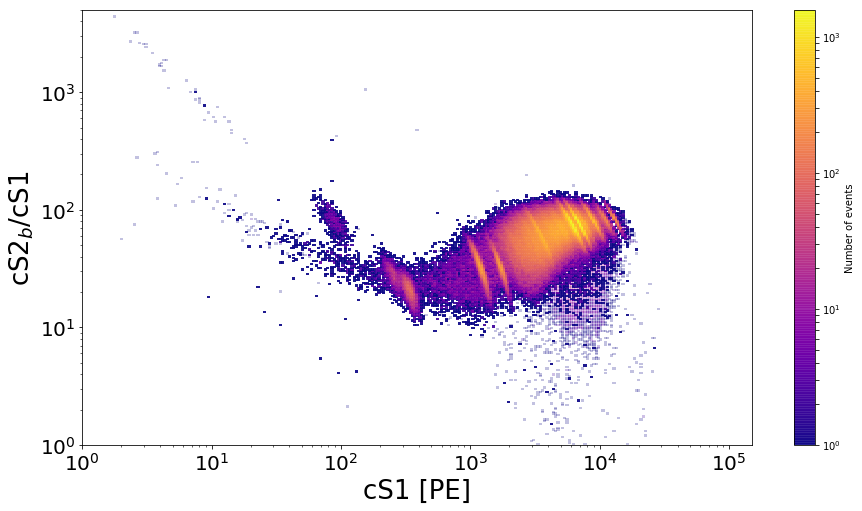

In [66]:
xbins = np.logspace(np.log10(1.0), np.log10(1.5e5), 300) # <- make a range from 10**xmin to 10**xmax
ybins = np.logspace(np.log10(1.0), np.log10(5e3), 300) # <- make a range from 10**ymin to 10**ymax

counts, _, _ = np.histogram2d(data_1['cs1_nn_tf'], data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf'], 
                              bins=(xbins, ybins))
counts_cut, _, _ = np.histogram2d(data_cut['cs1_nn_tf'], data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf'], 
                                  bins=(xbins, ybins))
plt.figure(figsize=(15,8))
pcm = plt.pcolormesh(xbins, ybins, np.transpose(counts),
                    cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), alpha=0.25)

pcm_cut = plt.pcolormesh(xbins, ybins, np.transpose(counts_cut),
                    cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), alpha=0.9)

plt.colorbar(pcm_cut, label='Number of events')
plt.xscale("log")               # <- Activate log scale on X axis
plt.yscale("log")               # <- Activate log scale on Y axis
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26)
plt.tick_params(labelsize=20)

plt.show()

In [43]:
###############################################
# Questi sono i dati che non passi il cut di S1
data_cut_bad = hax.cuts.selection(data_1, data_1['CutS1PL'] == False)
###############################################

Unnamed selection: 370806 rows removed (18.69% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


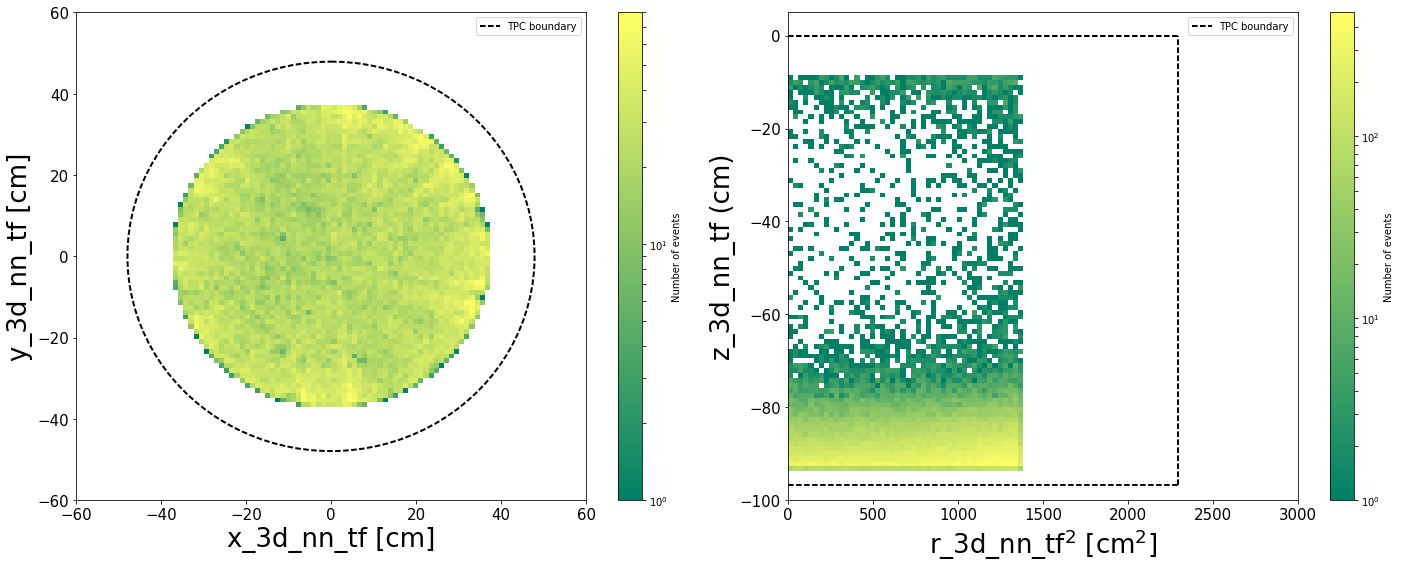

In [44]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.hist2d(data_cut_bad['x_3d_nn_tf'], data_cut_bad['y_3d_nn_tf'], 
           bins=(100,100), range=((-60,60), (-60,60)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt_circle(linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
#plt.xlim((-60,60))
#plt.ylim((-60,60))
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)
################################################

################################################
plt.subplot(122)
plt.hist2d((data_cut_bad['r_3d_nn_tf']**2), data_cut_bad['z_3d_nn_tf'], 
           bins=(100,100), 
           range=((0,3000), (-100,5)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


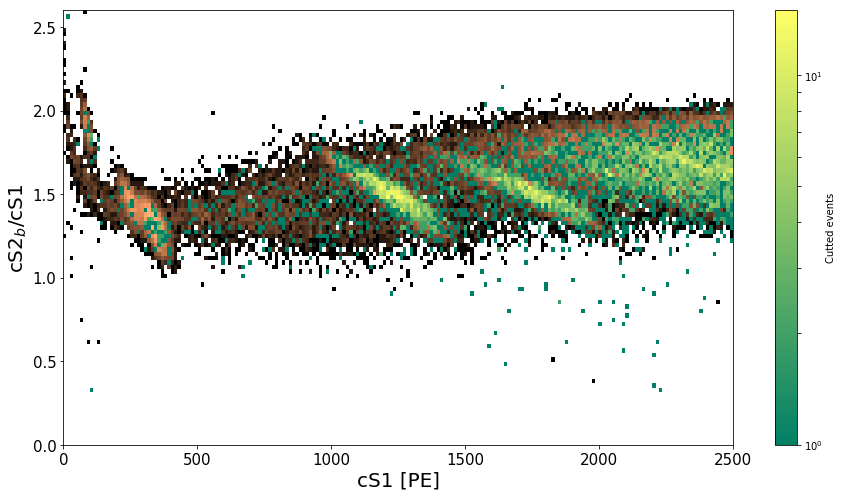

In [46]:
plt.figure(figsize=(15,8))

###################################################################################################
#plt.subplot(211)
xbins = np.linspace(0, 2.5e3, 200)
ybins = np.linspace(0, np.log10(4e2), 100)

plt.hist2d(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']), 
           bins=[xbins, ybins], 
           #range=((0,1.5e5), (0,5e3)), 
           cmap=plt.cm.copper, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.hist2d(data_cut_bad['cs1_nn_tf'], np.log10(data_cut_bad['cs2_bottom_nn_tf']/data_cut_bad['cs1_nn_tf']), 
           bins=[xbins, ybins], 
           #range=((0,1.5e5), (0,5e3)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Cutted events', orientation="vertical")
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('cS2$_b$/cS1', fontsize=20) 
plt.tick_params(labelsize=15)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


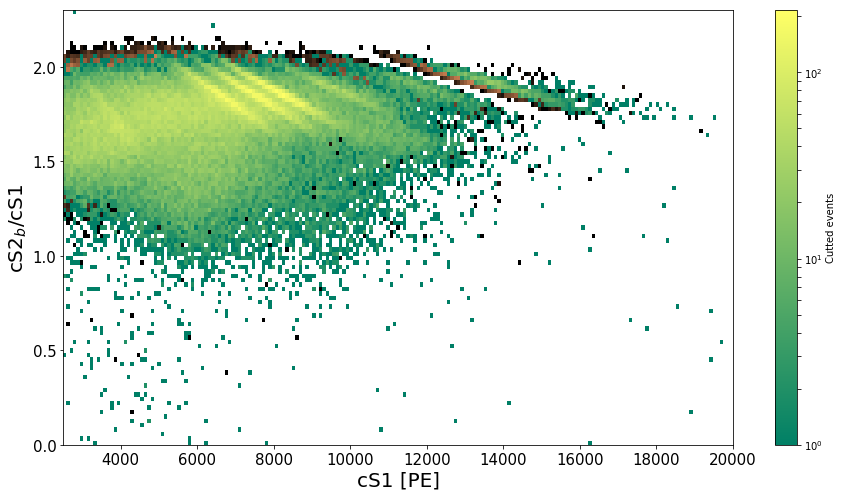

In [47]:
plt.figure(figsize=(15,8))

###################################################################################################
#plt.subplot(212)
xbins = np.linspace(2.5e3, 2e4, 200)
ybins = np.linspace(0, np.log10(2e2), 100)

plt.hist2d(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']), 
           bins=[xbins, ybins], 
           #range=((0,1.5e5), (0,5e3)), 
           cmap=plt.cm.copper, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.hist2d(data_cut_bad['cs1_nn_tf'], np.log10(data_cut_bad['cs2_bottom_nn_tf']/data_cut_bad['cs1_nn_tf']),
           bins=[xbins, ybins], 
           #range=((0,1.5e5), (0,5e3)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Cutted events', orientation="vertical")
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('cS2$_b$/cS1', fontsize=20) 
plt.tick_params(labelsize=15)

###################################################################################################

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


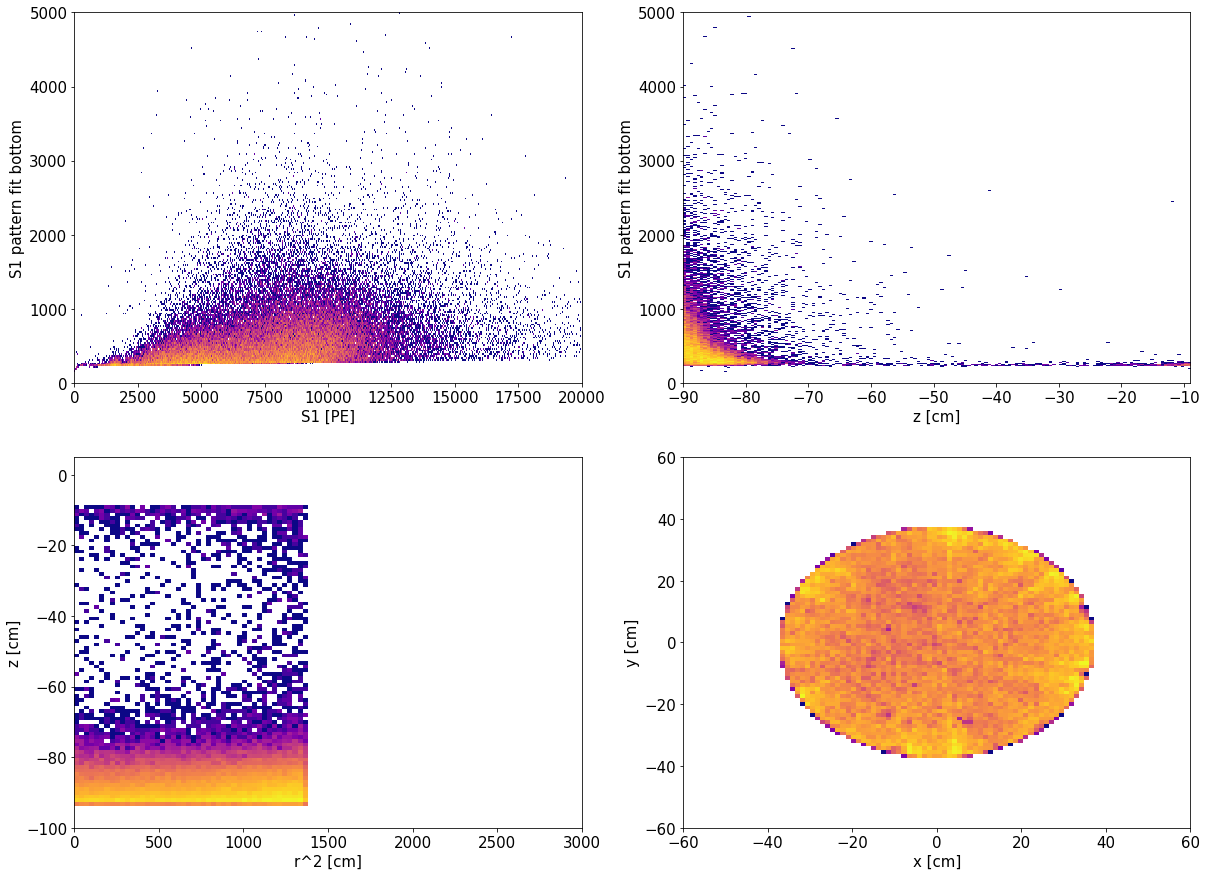

In [49]:
### Vediamo in s1 e z glie venti tagliati

plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.hist2d(data_cut_bad['s1'], 
           data_cut_bad['s1_pattern_fit_bottom_hax'], 
           bins = (700, 200), 
           range=((0,2e4), (0,5000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('S1 [PE]', fontsize=15)
plt.ylabel('S1 pattern fit bottom', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(222)
plt.hist2d(data_cut_bad['z_3d_nn_tf'], 
           data_cut_bad['s1_pattern_fit_bottom_hax'], 
           bins = (150, 800), 
           range=((-90, -9), (0, 5000)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('z [cm]', fontsize=15)
plt.ylabel('S1 pattern fit bottom', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(223)
plt.hist2d(data_cut_bad['r_3d_nn_tf']**2, 
           data_cut_bad['z_3d_nn_tf'], 
           bins = (100, 100), 
           range=((0,3000), (-100,5)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('r^2 [cm]', fontsize=15)
plt.ylabel('z [cm]', fontsize=15)
plt.tick_params(labelsize=15)

plt.subplot(224)
plt.hist2d(data_cut_bad['x_3d_nn_tf'], 
           data_cut_bad['y_3d_nn_tf'], 
           bins = (100, 100), 
           range=((-60,60), (-60,60)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
#plt.plot(xbins_center_valid, y_valid, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.legend(loc='best')
plt.xlabel('x [cm]', fontsize=15)
plt.ylabel('y [cm]', fontsize=15)
plt.tick_params(labelsize=15)


In [50]:
print( popt_z, popt_z_low, popt_1, popt_2, xbins_center_valid[idx][0]) #xbins ->600

[2.36860036e+02 4.53297865e-06 2.12433182e-01] [140.0709801    1.07141775] [ 5.26272437e+01  1.85004748e+01 -5.34039715e-01  4.14707986e-03] [2.18326858e+02 1.47501163e+02 4.28495697e-05] 173.68421052631578


popt_z
def exp(x, p0, p1, p3):
    return p0 + p1 *np.exp(-p3*x)

popt_z_low
def poly1(x, p0, p1):
    return p0 + p1 * x

popt_1 up to 600 PE
def S1PatternLikelihoodProfile_old(x, a, b, c, d, e):
    return a + b*pow(x, 0.5) + c*x + d*pow(x, 1.5) + e*pow(x, 2)

popt_2 after 600 PE
def S1arctan(x, p0, p1, p2):
    return p0 + p1*np.arctan(p2*x)